## Tests

In [450]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [539]:
final_df = pd.read_csv('data/final_dataset_inflated.csv')

## Examining the dataset

Min and Max Year and Revenue

In [530]:
print(f"Minimum year is {final_df.Year.min()}")
print(f"Maximum year is {final_df.Year.max()}")
print(f"Minimum revenue is {final_df['Worldwide(USD)_Inflated'].min()}")
print(f"Maximum revenue is {final_df['Worldwide(USD)_Inflated'].max()}")

Minimum year is 2000
Maximum year is 2019
Minimum revenue is 35900.1999750028
Maximum revenue is 3784540437.008462


# Basic Analysis on our Megaset

### Foreign & Domestic Percentages Distribution

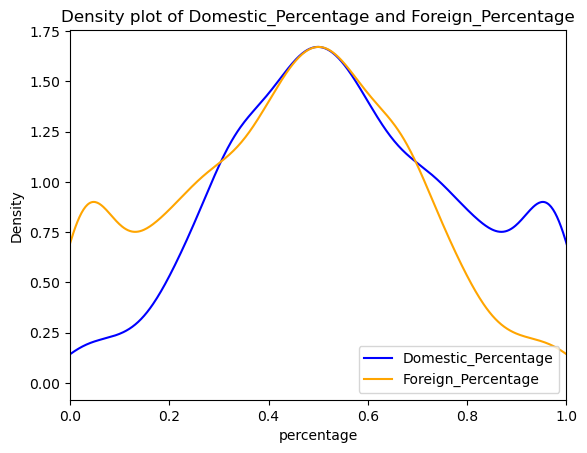

In [531]:
df_copy = final_df.copy(deep=True)
df_percentage = final_df.dropna(subset=['Domestic_Percentage', 'Foreign_Percentage'])

df_percentage.Domestic_Percentage.plot.density(color='blue')
df_percentage.Foreign_Percentage.plot.density(color='orange')

plt.title('Density plot of Domestic_Percentage and Foreign_Percentage')
plt.xlabel('percentage')
plt.xlim(0, 1)
plt.legend(["Domestic_Percentage", "Foreign_Percentage"], loc="lower right")
plt.show()



Most movies share their money-making between home and abroad, with many movies around the 50% split. However, some movies rely more on foreign audiences to make money.

## Features affecting the foreign percentage, and foreign gross

In [743]:
df_exploded = final_df.copy(deep=True)
df_exploded['Genres'] = final_df['Genres'].str.split(',')
df_exploded = df_exploded.explode('Genres')
df_exploded['Genres'] = df_exploded['Genres'].str.strip()

genre_counts = df_exploded['Genres'].value_counts()
genre_counts_20 = genre_counts.head(20)

In [ ]:
## take out the word film...TODO


In [507]:
with pd.option_context('display.max_rows', None): 
    print(genre_counts)

Genres
drama                                       1865
comedy                                      1368
thriller                                    1103
action                                      1026
adventure                                    751
romance film                                 510
horror                                       473
fantasy                                      453
crime fiction                                402
mystery                                      396
action/adventure                             376
romantic comedy                              285
indie                                        253
science fiction                              235
biography                                    227
sci-fi                                       219
family film                                  213
period piece                                 210
crime                                        199
romance                                      188
romantic dram

In [744]:
## filter the movies not present in the first 20 categories..
genres = final_df['Genres'].str.split(',')
filtered_df = final_df[genres.apply(lambda x: any(item in x for item in genre_counts_20.index))]

In [ ]:
filtered_df ## loosing 500 movies..

,Name,Year,Countries,Genres,Budget(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score
0,10 cloverfield lane,2016,united states,"drama, horror, sci-fi, thriller",6.076746e+06,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91
1,"10,000 bc",2008,united states of america,"thriller, adventure, costume drama, action/adv...",1.441563e+08,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10
3,12 strong,2018,united states,"action, drama, history, war",3.979050e+07,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50
4,12 years a slave,2013,united states of america,"biography, drama, history",2.539260e+07,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95
5,127 hours,2010,united states of america,"thriller, biographical film, drama, adventure",2.433688e+07,2.479013e+07,0.301870,5.733171e+07,0.698130,8.212184e+07,94,r,0.85,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,zookeeper,2011,united states of america,"romance film, family film, comedy",1.065253e+08,1.070058e+08,0.470482,1.204330e+08,0.529518,2.274388e+08,102,pg,0.41,0.14
2724,zoolander 2,2016,united states,"action, adventure, comedy, mystery, romance",6.076746e+07,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22
2725,zoom,2006,united states of america,"science fiction, action, fantasy, adventure",5.014200e+07,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05
2726,zootopia,2016,united states,"action, adventure, animation, comedy, crime, f...",1.823024e+08,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98


In [602]:
!pip install sentence-transformers

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
    --------------------------------------- 2.6/203.1 MB 12.5 MB/s eta 0:00:16
   - -------------------------------------- 5.5/203.1 MB 12.9 MB/s eta 0:00:16
   - -------------------------------------- 7.9/203.1 MB 12.5 MB/s eta 0:00:16
   -- ------------------------------------- 11.0/203.1 MB 13.5 MB/s eta 0:00:15
   -- ------------------------------------- 13.6/203.1 MB 13.2 MB/s eta 0:00:15
   --- ----------------

In [ ]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np
from collections import defaultdict

# Load Sentence Transformers Model
model = SentenceTransformer("all-MiniLM-L6-v2")  # A lightweight, fast model


In [746]:


# Step 1: Compute embeddings for all genres
genre_embeddings = {}
for genre in genre_counts.index:
    genre_embeddings[genre] = model.encode(genre, convert_to_tensor=True)

# Step 2: Group genres using cosine similarity
def cluster_genres(genre_embeddings, threshold=0.7):
    genres = list(genre_embeddings.keys())
    visited = set()
    clusters = defaultdict(list)
    
    for genre in genres:
        if genre in visited:
            continue
        
        # Start a new cluster
        clusters[genre].append(genre)
        visited.add(genre)
        
        for other_genre in genres:
            if other_genre in visited or other_genre == genre:
                continue
            
            # Calculate cosine similarity
            sim = util.cos_sim(genre_embeddings[genre], genre_embeddings[other_genre]).item()
            if sim >= threshold:
                clusters[genre].append(other_genre)
                visited.add(other_genre)
    return clusters

# Step 3: Perform clustering
clusters = cluster_genres(genre_embeddings, threshold=0.7)

# Step 4: Aggregate counts and print results
for representative, group in clusters.items():
    total_count = sum(genre_counts.get(g, 0) for g in group)
    print(f"Representative Genre: {representative}")
    print(f"Total Count: {total_count}")
    print(f"Grouped Genres: {group}\n")


Representative Genre: drama
Total Count: 1539
Grouped Genres: ['drama', 'romantic drama', 'family drama', 'political drama', 'childhood drama', 'legal drama', 'fantasy drama']

Representative Genre: comedy
Total Count: 1324
Grouped Genres: ['comedy', 'comedy-drama', 'fantasy comedy', 'comedy of manners', 'sex comedy', 'comedy film', 'domestic comedy', 'action comedy', 'workplace comedy', 'musical comedy', 'comedy horror']

Representative Genre: thriller
Total Count: 1081
Grouped Genres: ['thriller', 'crime thriller', 'psychological thriller', 'action thrillers', 'thriller/suspense', 'erotic thriller', 'comedy thriller', 'sci-fi thriller']

Representative Genre: action
Total Count: 723
Grouped Genres: ['action']

Representative Genre: adventure
Total Count: 864
Grouped Genres: ['adventure', 'action/adventure', 'fantasy adventure', 'adventure comedy', 'costume adventure', 'sci-fi adventure']

Representative Genre: romance film
Total Count: 739
Grouped Genres: ['romance film', 'romantic c

In [748]:
import matplotlib.pyplot as plt
import numpy as np

# Create the mapping of representative genre and its groups
genre_mapping = {
    "drama": ['drama', 'romantic drama', 'family drama', 'political drama', 'childhood drama', 'legal drama', 'fantasy drama'],
    "comedy": ['comedy', 'comedy-drama', 'fantasy comedy', 'comedy of manners', 'sex comedy', 'comedy film', 'domestic comedy', 'action comedy', 'workplace comedy', 'musical comedy', 'comedy horror'],
    "thriller": ['thriller', 'crime thriller', 'psychological thriller', 'action thrillers', 'thriller/suspense', 'erotic thriller', 'comedy thriller', 'sci-fi thriller'],
    "action": ['action'],
    "adventure": ['adventure', 'action/adventure', 'fantasy adventure', 'adventure comedy', 'costume adventure', 'sci-fi adventure'],
    "romance film": ['romance film', 'romantic comedy', 'romance'],
    "horror": ['horror', 'psychological horror'],
    "fantasy": ['fantasy'],
    "mystery": ['mystery'],
    "crime fiction": ['crime fiction', 'crime', 'crime comedy', 'crime drama', 'detective fiction'],
    "indie": ['indie'],
    "biography": ['biography', 'biographical film'],
    "family film": ['family film'],
    "sci-fi": ['sci-fi', 'science fiction'],
    "period piece": ['period piece'],
    "animation": ['animation', 'computer animation', 'animated cartoon'],
    "teen": ['teen'],
    "film adaptation": ['film adaptation', 'film'],
    "family": ['family'],
    "musical": ['musical', 'music', 'musical drama', 'animated musical'],
    "history": ['history'],
    "coming of age": ['coming of age'],
    "sports": ['sports', 'sport', 'extreme sports', 'baseball'],
    "black comedy": ['black comedy', 'horror comedy'],
    "war film": ['war film', 'combat films', 'anti-war film'],
}


### using rapid fuzz

In [ ]:

# ## using rapid fuzz
# df_exploded = final_df.copy(deep=True)
# df_exploded['Genres'] = final_df['Genres'].str.split(',')
# df_exploded = df_exploded.explode('Genres')
# df_exploded['Genres'] = df_exploded['Genres'].str.strip()

# genre_counts = df_exploded['Genres'].value_counts()
# genre_counts_20 = genre_counts.head(10)



# from rapidfuzz import process, fuzz

# # Extract genre counts (top genres from df_exploded['Genres'])
# # genre_counts = df_exploded['Genres'].value_counts()

# # Create a dictionary to store unassigned genres and their group assignment
# unassigned_genres = {}

# # Iterate through all genres in genre_counts and assign them to representative genres based on similarity
# for genre in genre_counts.index:
#     assigned = False
#     for representative, grouped_genres in genre_mapping.items():
#         # Use RapidFuzz to find the best match between the unassigned genre and the grouped genres
#         matches = process.extract(genre, grouped_genres, scorer=fuzz.WRatio, limit=1)
#         best_match = matches[0]
        
#         # If the similarity score is above 80, assign the genre to the representative genre
#         if best_match[1] >= 90:
#             if representative not in unassigned_genres:
#                 unassigned_genres[representative] = []
#             unassigned_genres[representative].append(genre)
#             assigned = True
#             break  # Stop once we find a match
    
#     # If the genre couldn't be assigned, you can either leave it unassigned or create a new group
#     if not assigned:
#         unassigned_genres[genre] = [genre]

# # Display the updated unassigned genres with their new groupings
# for representative, genres in unassigned_genres.items():
#     print(f"Representative Genre: {representative}")
#     print(f"Assigned Genres: {genres}")
#     print()

Representative Genre: drama
Assigned Genres: ['drama', 'fantasy', 'comedy-drama', 'romantic drama', 'family', 'family drama', 'costume drama', 'political drama', 'docudrama', 'musical drama', 'crime drama', 'courtroom drama', 'melodrama', 'marriage drama', 'childhood drama', 'historical drama', 'inspirational drama', 'addiction drama', 'erotic drama', 'legal drama', 'fantasy drama']

Representative Genre: comedy
Assigned Genres: ['comedy', 'action', 'horror', 'romantic comedy', 'musical', 'black comedy', 'music', 'fantasy comedy', 'comedy of manners', 'crime comedy', 'sex comedy', 'comedy film', 'domestic comedy', 'action comedy', 'comedy of errors', 'adventure comedy', 'screwball comedy', 'horror comedy', 'workplace comedy', 'musical comedy', 'heavenly comedy', 'tragicomedy', 'comedy western', 'comedy thriller', 'courtroom comedy', 'film', 'comedy horror']

Representative Genre: thriller
Assigned Genres: ['thriller', 'crime', 'sci-fi', 'crime thriller', 'psychological thriller', 'susp

### rapidfuzz

In [470]:
## filter the data , keep movie only if it has a belonging 
!pip install rapidfuzz

In [ ]:
df_exploded = final_df.copy(deep=True)
df_exploded['Genres'] = final_df['Genres'].str.split(',')
df_exploded = df_exploded.explode('Genres')
df_exploded['Genres'] = df_exploded['Genres'].str.strip()

genre_counts = df_exploded['Genres'].value_counts()
genre_counts_20 = genre_counts.head(10)



from rapidfuzz import process, fuzz

grouped_genres = {}
unique_genres = genre_counts_20.keys()

# Iterate through unique genres and find matches with top genres
for genre in unique_genres:
    score = process.extract(genre, genre_counts_20.keys(), scorer=fuzz.WRatio)
    # if score > 80:  # Only consider matches above 80% similarity
    #     grouped_genres[genre] = match



In [ ]:
### since i have the genre mapping can i apply the scoring to see if any unassigned genres can be assigned to a group..
grouped_genres = {}
unique_genres = genre_counts_20.keys()


In [576]:
## filter the movies not present in the first 20 categories..

## i lose 500 movies of information if i don't map...
genres = final_df['Genres'].str.split(',')
filtered_df = final_df[genres.apply(lambda x: any(item in x for item in genre_counts_20.index))]

In [577]:
genre_counts_20.keys()

Index(['drama', 'comedy', 'thriller', 'action', 'adventure', 'romance film',
       'horror', 'fantasy', 'mystery', 'crime fiction'],
      dtype='object', name='Genres')

In [578]:
from rapidfuzz import process, fuzz

grouped_genres = {}
unique_genres = genre_counts_20.keys()

# Iterate through unique genres and find matches with top genres
for genre in unique_genres:
    score = process.extract(genre, genre_counts_20.keys(), scorer=fuzz.WRatio)
    # if score > 80:  # Only consider matches above 80% similarity
    #     grouped_genres[genre] = match


In [579]:
score

[('crime fiction', 100.0, 9),
 ('action', 81.81818181818181, 3),
 ('comedy', 49.090909090909086, 1),
 ('romance film', 48.0, 5),
 ('thriller', 41.53846153846154, 2)]

In [580]:
data = []
for genre in unique_genres:
    data.append(process.extractOne(genre, genre_counts_20.keys(), scorer=fuzz.WRatio))

In [581]:
from collections import defaultdict



# Step 1: Group scores by genre
genre_dict = defaultdict(list)

for genre, score, index in data:
    genre_dict[genre].append((score, index))

# Step 2: Select the most representative entry for each genre
most_representative = {}

for genre, values in genre_dict.items():
    # Sort by score (descending) and tie-break by index (ascending)
    values.sort(key=lambda x: (-x[0], x[1]))  # Sort by highest score, lowest index
    most_representative[genre] = values[0]    # Pick the top result

# Step 3: Output the results
for genre, (score, index) in most_representative.items():
    print(f"Genre: {genre}, Score: {score}, Index: {index}")



Genre: drama, Score: 100.0, Index: 0
Genre: comedy, Score: 100.0, Index: 1
Genre: thriller, Score: 100.0, Index: 2
Genre: action, Score: 100.0, Index: 3
Genre: adventure, Score: 100.0, Index: 4
Genre: romance film, Score: 100.0, Index: 5
Genre: horror, Score: 100.0, Index: 6
Genre: fantasy, Score: 100.0, Index: 7
Genre: mystery, Score: 100.0, Index: 8
Genre: crime fiction, Score: 100.0, Index: 9


In [587]:
from rapidfuzz import process, fuzz
import pandas as pd

# Example DataFrame with genres exploded and counted
genre_counts_df = genre_counts



# Step 1: Extract the genres
top_genres = genre_counts_df.keys()

# Step 2: Group similar genres using RapidFuzz
grouped_genres = {}
visited_genres = set()

# Compare each genre to the rest of the top genres
for genre in top_genres:
    if genre in visited_genres:
        continue
    
    # Find matches for the current genre
    matches = process.extract(
        genre, top_genres, scorer=fuzz.WRatio, score_cutoff=80
    )
    
    # Group matched genres together
    group = [match[0] for match in matches]
    
    # Use the most frequent genre as the representative
    grouped_genres[genre] = group
    visited_genres.update(group)

# Step 3: Print representative genres and their groups
for representative, group in grouped_genres.items():
    print(f"Representative Genre: {representative}")
    print(f"Grouped Genres: {group}\n")


Representative Genre: drama
Grouped Genres: ['drama', 'comedy-drama', 'romantic drama', 'family drama', 'costume drama']

Representative Genre: comedy
Grouped Genres: ['comedy', 'romantic comedy', 'comedy-drama', 'black comedy', 'fantasy comedy']

Representative Genre: thriller
Grouped Genres: ['thriller', 'crime thriller', 'psychological thriller', 'action thrillers', 'thriller/suspense']

Representative Genre: action
Grouped Genres: ['action', 'action/adventure', 'action thrillers', 'action comedy', 'crime fiction']

Representative Genre: adventure
Grouped Genres: ['adventure', 'action/adventure', 'fantasy adventure', 'family-oriented adventure', 'adventure comedy']

Representative Genre: romance film
Grouped Genres: ['romance film', 'romance', 'film', 'war film', 'haunted house film']

Representative Genre: horror
Grouped Genres: ['horror', 'horror comedy', 'natural horror films', 'sci-fi horror', 'costume horror']

Representative Genre: fantasy
Grouped Genres: ['fantasy', 'fantasy 

In [639]:
from rapidfuzz import process, fuzz
import pandas as pd

# Example input: genre counts (replace this with your actual DataFrame or Series)


# Step 1: Group similar genres using RapidFuzz
def cluster_genres(genre_counts, similarity_threshold=80):
    """
    Clusters genres based on similarity and aggregates their counts.
    
    Args:
        genre_counts (pd.Series): Genre counts with genre names as index.
        similarity_threshold (int): Minimum similarity score to group genres.
    
    Returns:
        dict: Dictionary with representative genres as keys and grouped genres with counts.
    """
    top_genres = genre_counts.index.tolist()
    visited_genres = set()
    grouped_genres = {}

    for genre in top_genres:
        if genre in visited_genres:
            continue

        # Find similar genres
        matches = process.extract(genre, top_genres, scorer=fuzz.WRatio, score_cutoff=similarity_threshold)

        # Create a group of similar genres
        group = [match[0] for match in matches]
        group_counts = {g: genre_counts[g] for g in group}  # Count for grouped genres

        # Find the representative genre (the one with the highest count in the group)
        representative_genre = max(group_counts, key=group_counts.get)

        # Add to grouped_genres
        grouped_genres[representative_genre] = group_counts

        # Mark all grouped genres as visited
        visited_genres.update(group)

    return grouped_genres

# Step 2: Balance diversity by selecting unique groups
def select_top_representative_genres(grouped_genres, top_n=20):
    """
    Select the top N representative genres ensuring diversity across clusters.
    
    Args:
        grouped_genres (dict): Grouped genres with counts.
        top_n (int): Number of representative genres to return.
    
    Returns:
        list: List of representative genres and their grouped genres.
    """
    selected_representatives = []
    used_genres = set()

    # Flatten all group counts into a list and sort by total count
    all_genre_data = []
    for representative, group_counts in grouped_genres.items():
        total_count = sum(group_counts.values())
        all_genre_data.append((representative, total_count, group_counts))

    # Sort by total count (descending)
    all_genre_data = sorted(all_genre_data, key=lambda x: x[1], reverse=True)

    for representative, total_count, group_counts in all_genre_data:
        if representative in used_genres:
            continue

        # Add to the selected representatives
        selected_representatives.append({
            "Representative Genre": representative,
            "Total Count": total_count,
            "Grouped Genres": list(group_counts.keys())
        })

        # Mark all genres in the group as used
        used_genres.update(group_counts.keys())

        # Stop when we have enough genres
        if len(selected_representatives) >= top_n:
            break

    return selected_representatives

# Step 3: Run the clustering and diversity selection
grouped_genres = cluster_genres(genre_counts, similarity_threshold=80)
top_genres = select_top_representative_genres(grouped_genres, top_n=20)

# Display the results
for genre in top_genres:
    print(f"Representative Genre: {genre['Representative Genre']}")
    print(f"Total Count: {genre['Total Count']}")
    print(f"Grouped Genres: {genre['Grouped Genres']}\n")


Representative Genre: drama
Total Count: 1340
Grouped Genres: ['legal drama', 'drama', 'inspirational drama']

Representative Genre: comedy
Total Count: 1054
Grouped Genres: ['courtroom comedy', 'comedy', 'sex comedy']

Representative Genre: thriller
Total Count: 798
Grouped Genres: ['erotic thriller', 'thriller', 'erotica']

Representative Genre: action
Total Count: 724
Grouped Genres: ['blaxploitation', 'action']

Representative Genre: romance film
Total Count: 610
Grouped Genres: ['coming-of-age film', 'film', 'romance film', 'family film', 'war film']

Representative Genre: crime fiction
Total Count: 602
Grouped Genres: ['crime', 'crime fiction', 'crime thriller', 'crime comedy', 'crime drama']

Representative Genre: adventure
Total Count: 559
Grouped Genres: ['costume adventure', 'adventure', 'nature', 'adventure comedy']

Representative Genre: horror
Total Count: 347
Grouped Genres: ['psychological horror', 'horror', 'horror comedy', 'sci-fi horror', 'comedy horror']

Representat

In [640]:
from rapidfuzz import process, fuzz
import pandas as pd

# Step 1: Adjust overlapping genres with weighted counts
def adjust_overlapping_genres(genre_counts, overlap_keywords=None, weight=0.5):
    """
    Adjusts counts for overlapping genres by redistributing their weight.
    
    Args:
        genre_counts (pd.Series): Original genre counts.
        overlap_keywords (list): Keywords indicating overlaps (e.g., romantic comedy).
        weight (float): Fraction of count to distribute to each group.
    
    Returns:
        pd.Series: Adjusted genre counts.
    """
    adjusted_counts = genre_counts.copy()
    overlap_keywords = overlap_keywords or ["romantic", "comedy", "drama", "action", "thriller"]

    # Iterate through all genres and redistribute overlapping genres
    for genre in genre_counts.index:
        matching_keywords = [kw for kw in overlap_keywords if kw in genre]
        
        # If a genre matches multiple keywords, split its weight proportionally
        if len(matching_keywords) > 1:
            redistributed_weight = genre_counts[genre] * weight / len(matching_keywords)
            for kw in matching_keywords:
                adjusted_counts[kw] = adjusted_counts.get(kw, 0) + redistributed_weight
            adjusted_counts[genre] = adjusted_counts[genre] * (1 - weight)  # Reduce original count

    return adjusted_counts

# Step 2: Group similar genres using RapidFuzz
def cluster_genres(genre_counts, similarity_threshold=80):
    """
    Clusters genres based on similarity and aggregates their counts.
    """
    top_genres = genre_counts.index.tolist()
    visited_genres = set()
    grouped_genres = {}

    for genre in top_genres:
        if genre in visited_genres:
            continue

        matches = process.extract(genre, top_genres, scorer=fuzz.WRatio, score_cutoff=similarity_threshold)
        group = [match[0] for match in matches]
        group_counts = {g: genre_counts[g] for g in group}
        representative_genre = max(group_counts, key=group_counts.get)

        grouped_genres[representative_genre] = group_counts
        visited_genres.update(group)

    return grouped_genres

# Step 3: Select top representative genres
def select_top_representative_genres(grouped_genres, top_n=20):
    """
    Selects the top N representative genres ensuring diversity across clusters.
    """
    selected_representatives = []
    used_genres = set()

    all_genre_data = []
    for representative, group_counts in grouped_genres.items():
        total_count = sum(group_counts.values())
        all_genre_data.append((representative, total_count, group_counts))

    all_genre_data = sorted(all_genre_data, key=lambda x: x[1], reverse=True)

    for representative, total_count, group_counts in all_genre_data:
        if representative in used_genres:
            continue

        selected_representatives.append({
            "Representative Genre": representative,
            "Total Count": total_count,
            "Grouped Genres": list(group_counts.keys())
        })
        used_genres.update(group_counts.keys())

        if len(selected_representatives) >= top_n:
            break

    return selected_representatives

# Step 4: Run the adjustments, clustering, and selection
adjusted_genre_counts = adjust_overlapping_genres(genre_counts, weight=0.5)
grouped_genres = cluster_genres(adjusted_genre_counts, similarity_threshold=80)
top_genres = select_top_representative_genres(grouped_genres, top_n=20)

# Display results
for genre in top_genres:
    print(f"Representative Genre: {genre['Representative Genre']}")
    print(f"Total Count: {genre['Total Count']}")
    print(f"Grouped Genres: {genre['Grouped Genres']}\n")


Representative Genre: drama
Total Count: 1403.5
Grouped Genres: ['legal drama', 'drama', 'inspirational drama']

Representative Genre: comedy
Total Count: 1147.0
Grouped Genres: ['courtroom comedy', 'comedy', 'sex comedy']

Representative Genre: thriller
Total Count: 807.25
Grouped Genres: ['erotic thriller', 'thriller', 'erotica']

Representative Genre: action
Total Count: 738.25
Grouped Genres: ['blaxploitation', 'action']

Representative Genre: romance film
Total Count: 610.0
Grouped Genres: ['coming-of-age film', 'film', 'romance film', 'family film', 'war film']

Representative Genre: crime fiction
Total Count: 602.0
Grouped Genres: ['crime', 'crime fiction', 'crime thriller', 'crime comedy', 'crime drama']

Representative Genre: adventure
Total Count: 559.0
Grouped Genres: ['costume adventure', 'adventure', 'nature', 'adventure comedy']

Representative Genre: romance
Total Count: 403.0
Grouped Genres: ['romantic', 'romantic comedy', 'romantic drama', 'romantic fantasy', 'romance'

In [562]:
data

('period piece', 100.0, 19)

In [460]:
!pip install RapidFuzz

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [697]:
genre_counts.head(20)

Genres
drama               1334
comedy              1029
thriller             787
action               723
adventure            535
romance film         377
horror               326
fantasy              317
mystery              286
crime fiction        274
action/adventure     274
romantic comedy      216
indie                180
biography            173
science fiction      172
family film          167
crime                158
sci-fi               150
romance              146
period piece         142
Name: count, dtype: int64

In [698]:
genre_mapping

{'drama': ['drama',
  'romantic drama',
  'family drama',
  'political drama',
  'childhood drama',
  'legal drama',
  'fantasy drama'],
 'comedy': ['comedy',
  'comedy-drama',
  'fantasy comedy',
  'comedy of manners',
  'sex comedy',
  'comedy film',
  'domestic comedy',
  'action comedy',
  'workplace comedy',
  'musical comedy',
  'comedy horror'],
 'thriller': ['thriller',
  'crime thriller',
  'psychological thriller',
  'action thrillers',
  'thriller/suspense',
  'erotic thriller',
  'comedy thriller',
  'sci-fi thriller'],
 'action': ['action'],
 'adventure': ['adventure',
  'action/adventure',
  'fantasy adventure',
  'adventure comedy',
  'costume adventure',
  'sci-fi adventure'],
 'romance film': ['romance film', 'romantic comedy', 'romance'],
 'horror': ['horror', 'psychological horror'],
 'fantasy': ['fantasy'],
 'mystery': ['mystery'],
 'crime fiction': ['crime fiction',
  'science fiction',
  'crime',
  'crime comedy',
  'crime drama',
  'detective fiction'],
 'indie':

final_df

## Genre anaylsis 

In [752]:
## PLOT GENRE FREQUENCY.. 
len(genre_mapping.keys())

25

In [778]:
import pandas as pd
profit_df = final_df.copy(deep=True)
profit_df['Genres'] = profit_df['Genres'].str.replace('/', ', ')

# Create a column for each genre in the mapping
for representative_genre, subgenres in genre_mapping.items():
    profit_df[representative_genre] = profit_df['Genres'].apply(
        lambda x: 1 if any(subgenre in x for subgenre in subgenres) else 0
    )

# Drop rows where no genre matches any subgroup
genre_columns = list(genre_mapping.keys())
profit_df = profit_df[profit_df[genre_columns].sum(axis=1) > 0]


In [779]:
profit_df.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'drama', 'comedy', 'thriller', 'action', 'adventure',
       'romance film', 'horror', 'fantasy', 'mystery', 'crime fiction',
       'indie', 'biography', 'family film', 'sci-fi', 'period piece',
       'animation', 'teen', 'film adaptation', 'family', 'musical', 'history',
       'coming of age', 'sports', 'black comedy', 'war film'],
      dtype='object')

<Axes: >

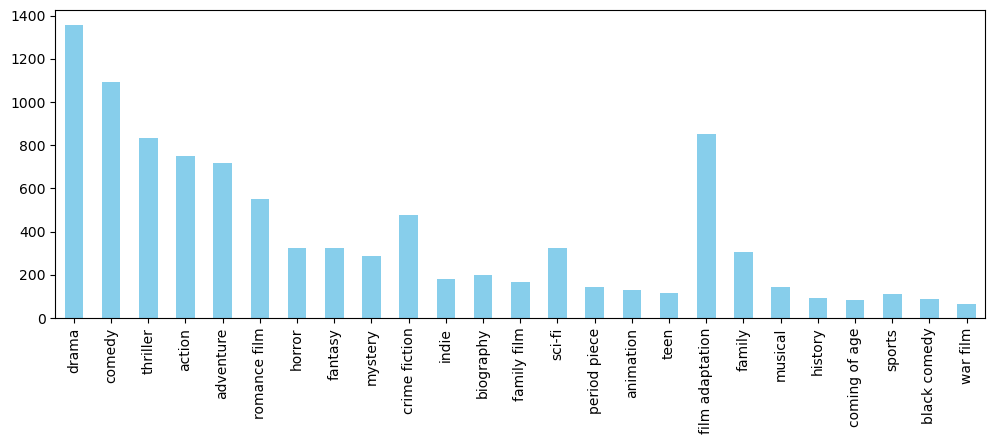

In [766]:
## plot the frequency plot.. 
genre_final_counts = profit_df[genre_columns].sum()
genre_final_counts.sort_values(ascending=False)
genre_final_counts.plot(kind='bar', color='skyblue', figsize=(12, 4))

Plotting a bar plot showcasing the sum of the domestic and foregin gross for each chosen genre

<Figure size 1200x600 with 0 Axes>

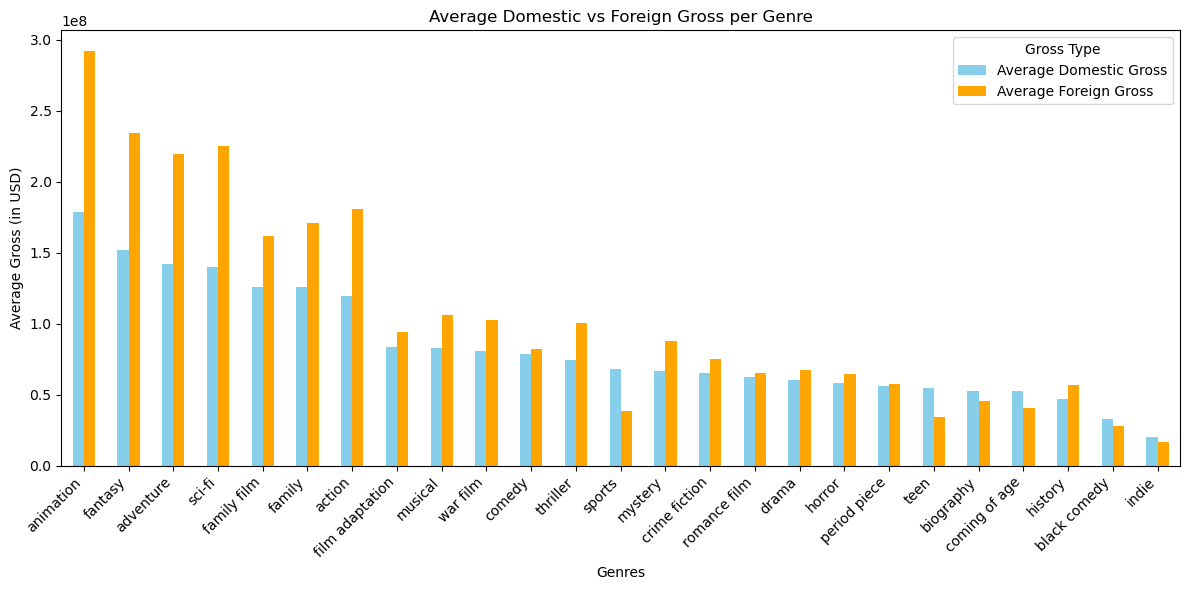

In [ ]:
## NOT INDICATIVE BECAUSE OF THE HUGE PRESENCE OF OUTLIERS
genre_columns = ['drama', 'comedy', 'thriller', 'action', 'adventure', 'romance film', 
                 'horror', 'fantasy', 'mystery', 'crime fiction', 'indie', 'biography',
                 'family film', 'sci-fi', 'period piece', 'animation', 'teen', 
                 'film adaptation', 'family', 'musical', 'history', 'coming of age', 
                 'sports', 'black comedy', 'war film']

# Initialize lists to store results
average_domestic = []
average_foreign = []

# Loop through each genre to calculate averages
for genre in genre_columns:
    domestic_mean = profit_df[profit_df[genre] == 1]['Domestic(USD)_Inflated'].mean()
    foreign_mean = profit_df[profit_df[genre] == 1]['Foreign(USD)_Inflated'].mean()
    average_domestic.append(domestic_mean)
    average_foreign.append(foreign_mean)

# Combine results into a DataFrame for plotting
average_gross_per_genre = pd.DataFrame({
    'Genre': genre_columns,
    'Average Domestic Gross': average_domestic,
    'Average Foreign Gross': average_foreign
})

# Sort genres by Average Domestic Gross for better visualization
average_gross_per_genre = average_gross_per_genre.sort_values(by='Average Domestic Gross', ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
average_gross_per_genre.set_index('Genre').plot(kind='bar', stacked=False, color=['skyblue', 'orange'], figsize=(12, 6))

plt.title('Average Domestic vs Foreign Gross per Genre')
plt.ylabel('Average Gross (in USD)')
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gross Type')
plt.tight_layout()
plt.show()


This bar plot showcases the dominance of foreign gross (orange) over domestic gross (blue) across all of the top 20 genres, especially for action, adventure, drama, thriller and family film; indicating strong international appeal. In contrast, genres like comedy, romance film and crime fiction show a more balanced domestic and foreign gross, suggesting greater resonance with U.S. audiences. Overall, while this chart reveals genre-specific market preferences, it is susceptible to skewing, as genres with more movies will naturally have higher gross totals.

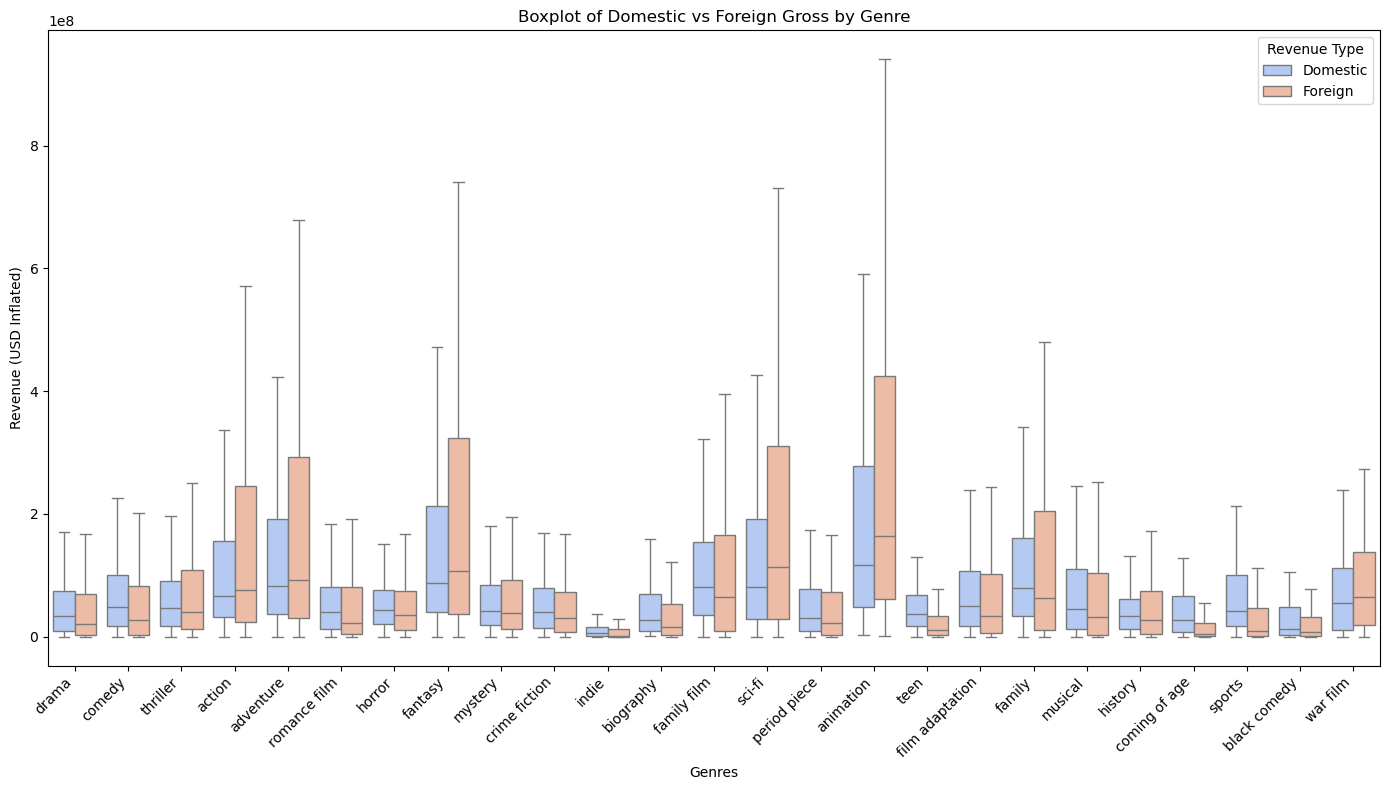

In [ ]:
plot_data = []

for genre in genre_columns:

    genre_data = profit_df[profit_df[genre] == 1]
    for _, row in genre_data.iterrows():
        plot_data.append({'Genre': genre, 'Revenue': row['Domestic(USD)_Inflated'], 'Type': 'Domestic'})
        plot_data.append({'Genre': genre, 'Revenue': row['Foreign(USD)_Inflated'], 'Type': 'Foreign'})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(14, 8))
sns.boxplot(data=plot_df, x='Genre', y='Revenue', hue='Type', palette='coolwarm', showfliers=False)
plt.title('Boxplot of Domestic vs Foreign Gross by Genre')
plt.xlabel('Genres')
plt.ylabel('Revenue (USD Inflated)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Revenue Type')
plt.tight_layout()
plt.show()


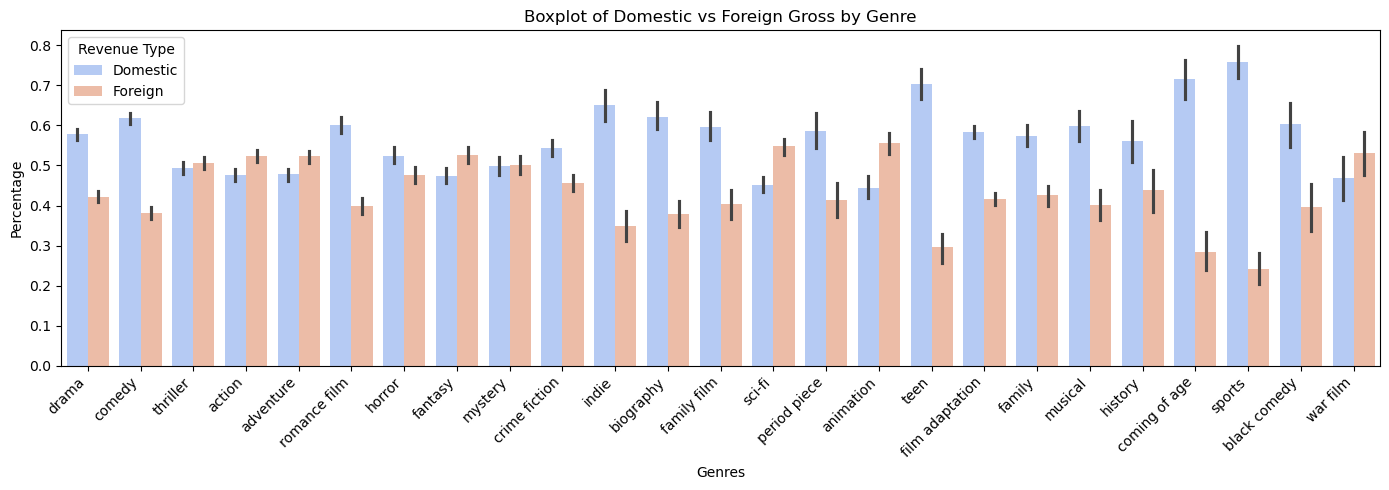

In [846]:
plot_data = []

for genre in genre_columns:

    genre_data = profit_df[profit_df[genre] == 1]
    for _, row in genre_data.iterrows():
        plot_data.append({'Genre': genre, 'Revenue': row['Domestic_Percentage'], 'Type': 'Domestic'})
        plot_data.append({'Genre': genre, 'Revenue': row['Foreign_Percentage'], 'Type': 'Foreign'})

plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(14, 5))
sns.barplot(data=plot_df, x='Genre', y='Revenue', hue='Type', palette='coolwarm')
plt.title('Boxplot of Domestic vs Foreign Gross by Genre')
plt.xlabel('Genres')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Revenue Type')
plt.tight_layout()
plt.show()

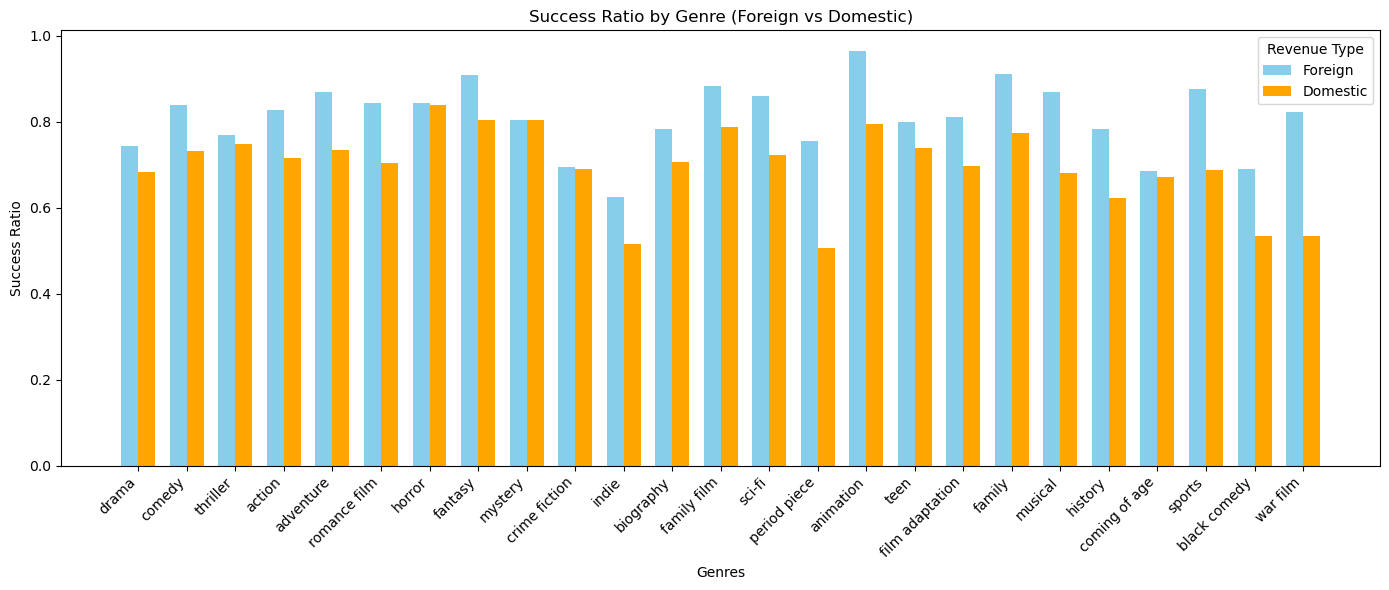

In [ ]:

plot_data = []
ratio = []
ratio_2 = []

for genre in genre_columns:
    genre_data = profit_df[profit_df[genre] == 1]

    successful_movies = genre_data[(genre_data['Worldwide_profit'] > 1) & (genre_data['Foreign_Percentage'] > 0.5)]
    ratio_value = len(successful_movies) / len(genre_data[genre_data['Foreign_Percentage'] > 0.5])

    successful_domestic_movies = genre_data[(genre_data['Worldwide_profit'] > 1) & (genre_data['Domestic_Percentage'] > 0.5)]
    ratio_value_2 = len(successful_domestic_movies) / len(genre_data[genre_data['Domestic_Percentage'] > 0.5])

    ratio.append({'Genre': genre, 'Ratio': ratio_value})
    ratio_2.append({'Genre': genre, 'Ratio': ratio_value_2})

plot_df = pd.DataFrame(ratio)
plot_df_2 = pd.DataFrame(ratio_2)

plt.figure(figsize=(14, 6))

bar_width = 0.35
index = np.arange(len(plot_df))

plt.bar(index, plot_df['Ratio'], bar_width, color='skyblue', label='Foreign')
plt.bar(index + bar_width, plot_df_2['Ratio'], bar_width, color='orange', label='Domestic')

plt.xlabel('Genres')
plt.ylabel('Success Ratio')
plt.title('Success Ratio by Genre (Foreign vs Domestic)')
plt.xticks(index + bar_width / 2, plot_df['Genre'], rotation=45, ha='right')
plt.legend(title='Revenue Type')
plt.tight_layout()

plt.show()
## if there is more foreign audience the movie is more successful.. but it is intrisic, if it is more successful it wil be more foreign audience..
# so can i prove that it is the foreign audience that makes the movie successful..


## Are movies that fair better outside movies that most likely succeed? indipendent on the budget.

If a movie is more successful, it's likely to have a higher foreign audience share, but this doesn't necessarily imply that the foreign audience share causes the success.

. Correlation Analysis:  
You can check the correlation between the Foreign_Percentage and Worldwide_profit while controlling for other variables that might influence success. This would help you identify if the relationship is indeed strong between foreign audience share and worldwide success.

In [847]:
correlation = profit_df[['Foreign_Percentage', 'Foreign(USD)_Inflated', 'Domestic(USD)_Inflated', 'Domestic_Percentage', 'Worldwide_profit',  'Worldwide(USD)_Inflated', 'Budget(USD)_Inflated', 'Runtime(mins)', 'Critics_Score']].corr()
correlation


,Foreign_Percentage,Foreign(USD)_Inflated,Domestic(USD)_Inflated,Domestic_Percentage,Worldwide_profit,Worldwide(USD)_Inflated,Budget(USD)_Inflated,Runtime(mins),Critics_Score
Foreign_Percentage,1.000000,0.376069,0.177629,-1.000000,0.012883,0.315086,0.336068,0.183167,0.048466
Foreign(USD)_Inflated,0.376069,1.000000,0.858847,-0.376069,0.050486,0.981667,0.749454,0.361761,0.176167
Domestic(USD)_Inflated,0.177629,0.858847,1.000000,-0.177629,0.076120,0.940736,0.703353,0.337507,0.216004
Domestic_Percentage,-1.000000,-0.376069,-0.177629,1.000000,-0.012883,-0.315086,-0.336068,-0.183167,-0.048466
Worldwide_profit,0.012883,0.050486,0.076120,-0.012883,1.000000,0.061751,-0.074726,-0.053178,0.078259
Worldwide(USD)_Inflated,0.315086,0.981667,0.940736,-0.315086,0.061751,1.000000,0.757924,0.365105,0.197014
Budget(USD)_Inflated,0.336068,0.749454,0.703353,-0.336068,-0.074726,0.757924,1.000000,0.414221,0.016339
Runtime(mins),0.183167,0.361761,0.337507,-0.183167,-0.053178,0.365105,0.414221,1.000000,0.249027
Critics_Score,0.048466,0.176167,0.216004,-0.048466,0.078259,0.197014,0.016339,0.249027,1.000000


In [ ]:
profit_df['Worldwide_profit'] = final_df['Worldwide(USD)_Inflated']/final_df['Budget(USD)_Inflated']
## out of all the profitable movies how many have profitability more foreig

<Axes: >

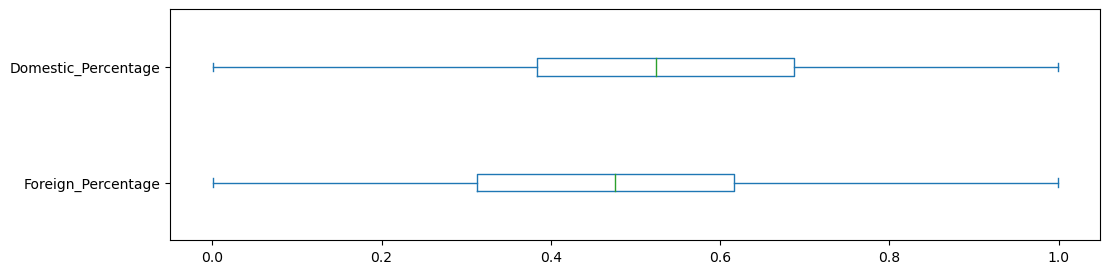

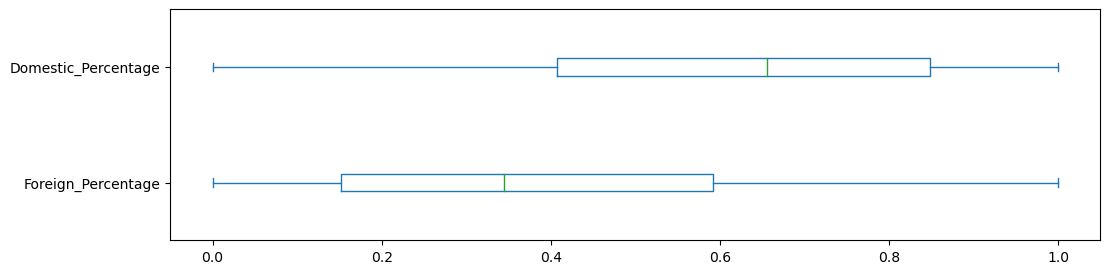

In [ ]:
# Apply the conditions using logical operators & and parentheses for proper precedence
profit_df[(profit_df['Worldwide_profit'] > 1) ][['Foreign_Percentage', 'Domestic_Percentage']].plot(kind='box', vert=False, figsize=(12, 3))
profit_df[(profit_df['Worldwide_profit'] < 1) ][['Foreign_Percentage', 'Domestic_Percentage']].plot(kind='box', vert=False, figsize=(12, 3))

#### correlations..

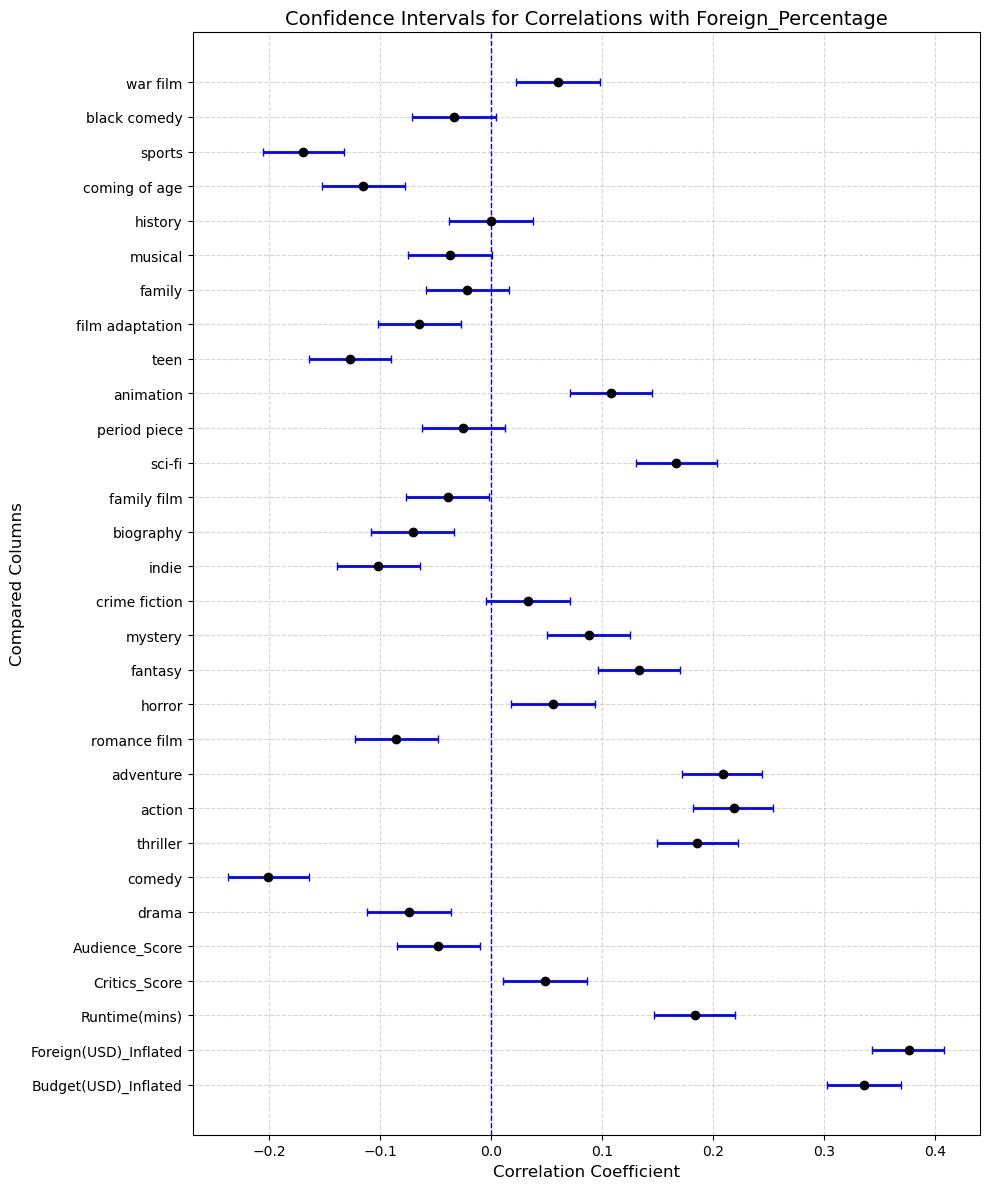

,Compared Column,Correlation,P-Value,Lower_CI,Upper_CI
0,Budget(USD)_Inflated,0.336,0.000,0.302,0.369
1,Foreign(USD)_Inflated,0.376,0.000,0.343,0.408
2,Runtime(mins),0.183,0.000,0.147,0.219
3,Critics_Score,0.048,0.012,0.011,0.086
4,Audience_Score,-0.048,0.013,-0.085,-0.010
5,drama,-0.074,0.000,-0.111,-0.037
6,comedy,-0.201,0.000,-0.237,-0.164
7,thriller,0.186,0.000,0.149,0.222
8,action,0.218,0.000,0.182,0.254
9,adventure,0.208,0.000,0.172,0.244


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns of interest and other columns for comparison
columns_of_interest_tot = ['Budget(USD)_Inflated', 'Foreign(USD)_Inflated', 'Foreign_Percentage', 
                           'Runtime(mins)', 'Critics_Score', 'Audience_Score'] + list(genre_mapping.keys())

# Target column and other columns to compare
target_column = 'Foreign_Percentage'
other_columns = [col for col in columns_of_interest_tot if col != target_column]

# Function to calculate correlation coefficients and p-values
def compute_correlations(df, target_col, other_columns):
    results = []
    for col in other_columns:
        valid_data = df[[target_col, col]].dropna()
        if len(valid_data) > 2:  # Ensure enough data points for Pearson's correlation
            corr, p_val = pearsonr(valid_data[target_col], valid_data[col])
            n = len(valid_data)  # Sample size
            results.append({
                'Compared Column': col,
                'Correlation': corr,
                'P-Value': p_val,
                'Sample Size': n
            })
    return pd.DataFrame(results)

# Function to calculate confidence intervals using Fisher transformation
def confidence_interval(corr, n, alpha=0.05):
    """Compute confidence interval for correlation."""
    if np.abs(corr) < 1:  # Fisher transformation is invalid for |corr| = 1
        z = 0.5 * np.log((1 + corr) / (1 - corr))  # Fisher transformation
        se = 1 / np.sqrt(n - 3)  # Standard error
        z_critical = 1.96  # For 95% confidence interval
        lower_z = z - z_critical * se
        upper_z = z + z_critical * se
        # Transform back to correlation scale
        lower_corr = (np.exp(2 * lower_z) - 1) / (np.exp(2 * lower_z) + 1)
        upper_corr = (np.exp(2 * upper_z) - 1) / (np.exp(2 * upper_z) + 1)
        return lower_corr, upper_corr
    else:
        return corr, corr  # If |corr| = 1, confidence interval is exact

# Calculate correlations, p-values, and confidence intervals
correlation_results = compute_correlations(profit_df, target_column, other_columns)

# Add confidence intervals
correlation_results['Lower_CI'], correlation_results['Upper_CI'] = zip(*correlation_results.apply(
    lambda row: confidence_interval(row['Correlation'], row['Sample Size']), axis=1))

# Plot correlations with confidence intervals
plt.figure(figsize=(10, 12))
plt.errorbar(
    correlation_results['Correlation'], 
    correlation_results['Compared Column'], 
    xerr=[correlation_results['Correlation'] - correlation_results['Lower_CI'], 
          correlation_results['Upper_CI'] - correlation_results['Correlation']],
    fmt='o', color='black', ecolor='blue', elinewidth=2, capsize=3
)
plt.axvline(0, color='blue', linestyle='--', linewidth=1)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Compared Columns", fontsize=12)
plt.title(f"Confidence Intervals for Correlations with {target_column}", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Display the table with results
display(correlation_results[['Compared Column', 'Correlation', 'P-Value', 'Lower_CI', 'Upper_CI']].round(3))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the columns of interest and other columns for comparison
columns_of_interest_tot = ['Budget(USD)_Inflated', 'Foreign(USD)_Inflated', 
                           'Runtime(mins)', 'Critics_Score', 'Audience_Score'] + list(genre_mapping.keys())

correlation_df = profit_df.copy(deep=True)
correlation_df = correlation_df[columns_of_interest_tot ]

# Prepare the dataset (with one-hot encoded genres)
X = correlation_df.drop(columns=['Foreign(USD)_Inflated'])
y = correlation_df['Foreign(USD)_Inflated']

# Train a Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Display the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


## if you want to analyse foreign_usd need to match based on the budget.. 


Feature: Budget(USD)_Inflated, Importance: 0.6712952005058541
Feature: Runtime(mins), Importance: 0.057692947715939975
Feature: Critics_Score, Importance: 0.06413662269209294
Feature: Audience_Score, Importance: 0.10225628695922333
Feature: drama, Importance: 0.009203415516297756
Feature: comedy, Importance: 0.004340681269139036
Feature: thriller, Importance: 0.005724986242953038
Feature: action, Importance: 0.009092662447229925
Feature: adventure, Importance: 0.003903177862591773
Feature: romance film, Importance: 0.004038952057631526
Feature: horror, Importance: 0.0027908161574159087
Feature: fantasy, Importance: 0.010642328507784213
Feature: mystery, Importance: 0.002819701283001402
Feature: crime fiction, Importance: 0.008316910863008628
Feature: indie, Importance: 0.00025704229183653147
Feature: biography, Importance: 0.0008848575989866397
Feature: family film, Importance: 0.003191064656991294
Feature: sci-fi, Importance: 0.00866104231040555
Feature: period piece, Importance: 0.00

In [785]:
correlation_results

,Target Column,Compared Column,Correlation,P-Value
0,Foreign(USD)_Inflated,Year,0.098106,3.055164e-07
1,Foreign(USD)_Inflated,Budget(USD)_Inflated,0.749454,0.000000e+00
2,Foreign(USD)_Inflated,Domestic(USD)_Inflated,0.858847,0.000000e+00
3,Foreign(USD)_Inflated,Domestic_Percentage,-0.376069,6.972666e-92
4,Foreign(USD)_Inflated,Worldwide(USD)_Inflated,0.981667,0.000000e+00
...,...,...,...,...
63,Foreign_Percentage,coming of age,-0.115047,1.860035e-09
64,Foreign_Percentage,sports,-0.169111,7.428765e-19
65,Foreign_Percentage,black comedy,-0.033276,8.311152e-02
66,Foreign_Percentage,war film,0.060351,1.661515e-03


# Proportion of Domestic vs Foreign gross for US movies over time

Domestic vs Foreign Income, Total and Percentage, for American movies over time

In [801]:
year_min = final_df['Year'].min()
year_max = final_df['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")

The range of the 'Year' column is: 2000 to 2019


In [802]:
# ANALYSING ONLY UNITED STATES
df_gross = final_df.drop(columns=['Budget(USD)_Inflated', 'Genres'])
df_gross = df_gross[df_gross['Countries'].str.contains('united states', na=False)]
df_gross = df_gross.dropna()
df_gross



,Name,Year,Countries,Domestic(USD)_Inflated,Domestic_Percentage,Foreign(USD)_Inflated,Foreign_Percentage,Worldwide(USD)_Inflated,Runtime(mins),Rating,Audience_Score,Critics_Score
0,10 cloverfield lane,2016,united states,8.760602e+07,0.654010,4.634613e+07,0.345990,1.339521e+08,103,pg-13,0.79,0.91
1,"10,000 bc",2008,united states of america,1.301309e+08,0.351333,2.402606e+08,0.648667,3.703914e+08,109,pg-13,0.37,0.10
2,12 rounds,2009,united states of america,1.667757e+07,0.708013,6.877890e+06,0.291987,2.355546e+07,108,pg-13,0.45,0.31
3,12 strong,2018,united states,5.209113e+07,0.644274,2.876133e+07,0.355726,8.085246e+07,130,r,0.62,0.50
4,12 years a slave,2013,united states of america,7.195247e+07,0.301875,1.663993e+08,0.698125,2.383517e+08,134,r,0.90,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
2723,zoolander,2001,united states of america,7.826600e+07,0.743197,2.704388e+07,0.256803,1.053099e+08,90,pg-13,0.80,0.64
2724,zoolander 2,2016,united states,3.506124e+07,0.508592,3.387664e+07,0.491408,6.893788e+07,101,pg-13,0.20,0.22
2725,zoom,2006,united states of america,1.717625e+07,0.958658,7.407176e+05,0.041342,1.791697e+07,93,pg,0.34,0.05
2726,zootopia,2016,united states,4.147601e+08,0.333340,8.294952e+08,0.666660,1.244255e+09,108,pg,0.92,0.98


The code below designs a histogram which gives the distribution of movies produced per year. 

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

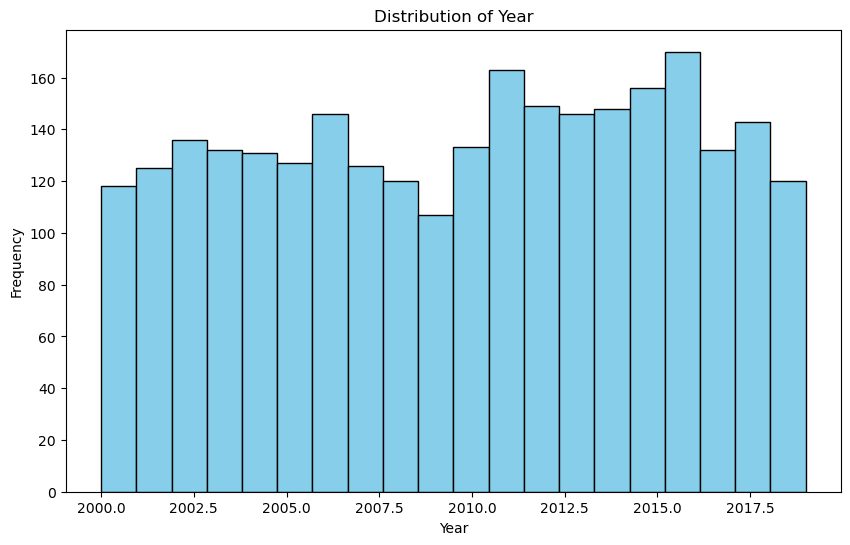

In [803]:
plt.figure(figsize=(10, 6))
plt.hist(df_gross['Year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid

The histogram demonstrates a clear bias in the dataset towards movies that were produced more recently, this could in large part be down to the increased collection of data once the information age arrived.

In [804]:
year_min = df_gross['Year'].min()
year_max = df_gross['Year'].max()

print(f"The range of the 'Year' column is: {year_min} to {year_max}")


The range of the 'Year' column is: 2000 to 2019


In order to see how the worldwide gross for US films has changed over time, we use a scatterplot for each of the American movies in our dataset.

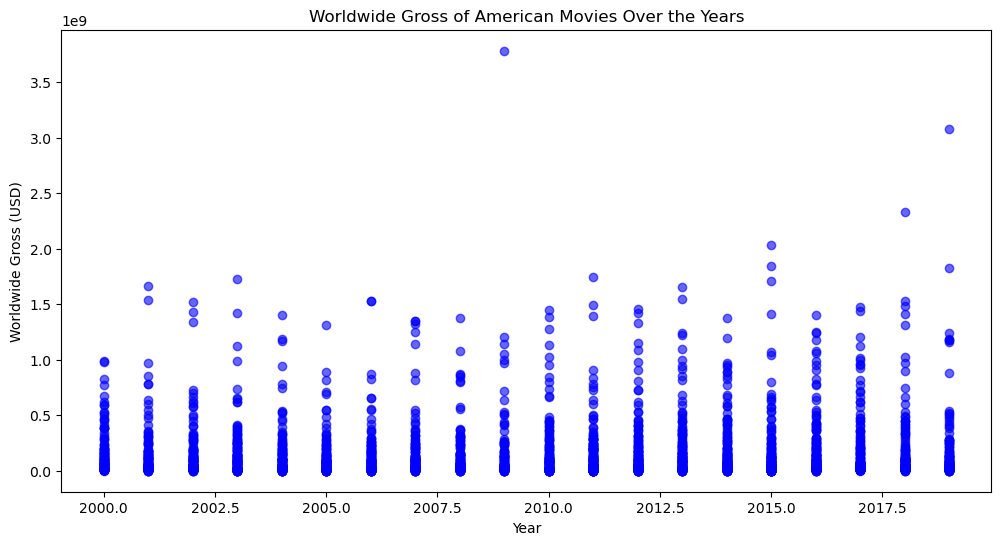

In [805]:
plt.figure(figsize=(12, 6))
plt.scatter(df_gross['Year'], df_gross['Worldwide(USD)_Inflated'], color='blue', alpha=0.6)

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies Over the Years')

plt.show()

The scatterplot does not show any clear trend towards an overall increase in worldwide gross as we approach the present day despite factors like inflation which would have suggested an increase.

The bar chart featured below was created with the intent of checking the trends in average worldwide gross per year (from 2000 to 2016) with a domestic/foreign gross split.

In [806]:
df_gross = df_gross[(df_gross['Year'] > 2000)&(df_gross['Year'] < 2019)]

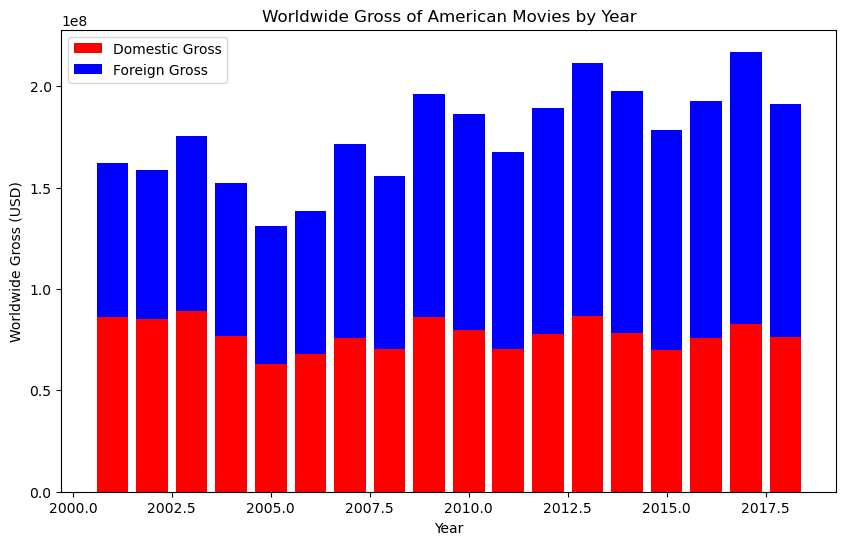

In [807]:
yearly_data = df_gross.groupby('Year')[['Domestic(USD)_Inflated', 'Foreign(USD)_Inflated']].mean()

plt.figure(figsize=(10, 6))
plt.bar(yearly_data.index, yearly_data['Domestic(USD)_Inflated'], color='red', label='Domestic Gross')
plt.bar(yearly_data.index, yearly_data['Foreign(USD)_Inflated'], bottom=yearly_data['Domestic(USD)_Inflated'], color='blue', label='Foreign Gross')

plt.xlabel('Year')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Worldwide Gross of American Movies by Year')
plt.legend()

plt.show()

As can be seen above, the gross overall has increased through the years with in general the foreign gross outpacing the domestic gross.

The lineplots below were made to showcase how the share of domestic vs foreign income changes over time.

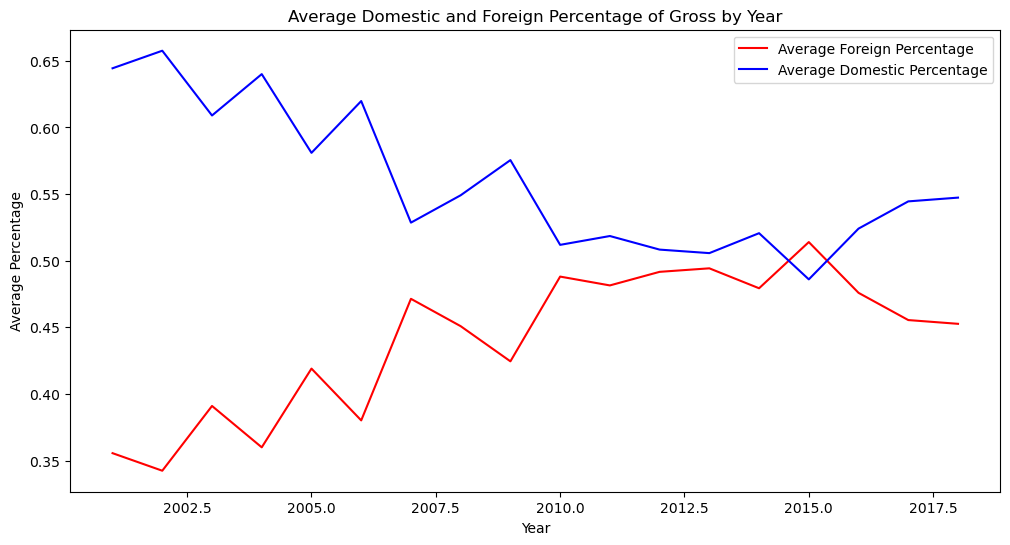

In [808]:
average_percentages = df_gross.groupby('Year')[['Foreign_Percentage', 'Domestic_Percentage']].mean()

plt.figure(figsize=(12, 6))

plt.plot(average_percentages.index, average_percentages['Foreign_Percentage'], color='red', label='Average Foreign Percentage')

plt.plot(average_percentages.index, average_percentages['Domestic_Percentage'], color='blue', label='Average Domestic Percentage')

plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.title('Average Domestic and Foreign Percentage of Gross by Year')
plt.legend()

plt.show()

The graph above clearly shows that the domestic share of the total revenue has fallen from 2000 onwards, and consequentially the inverse is true for the foreign share.

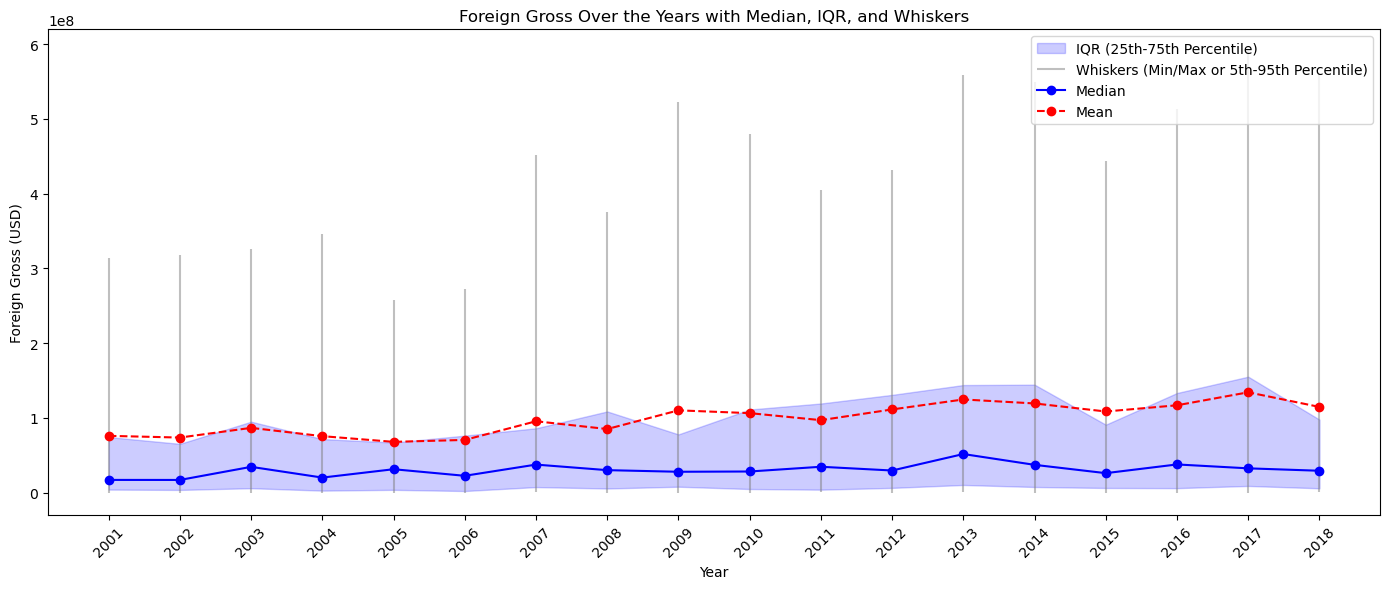

In [809]:
## SHOWING FOREIGN GROS
df_gross_filtered = df_gross[['Year', 'Foreign(USD)_Inflated']].dropna()
df_gross_filtered['Year'] = df_gross_filtered['Year'].astype(int)

# Group by 'Year' and calculate summary statistics
yearly_stats = df_gross_filtered.groupby('Year')['Foreign(USD)_Inflated'].agg(
    median='median',
    mean='mean',
    q25=lambda x: np.percentile(x, 25),  # 25th percentile
    q75=lambda x: np.percentile(x, 75),  # 75th percentile
    whisker_low=lambda x: max(np.min(x), np.percentile(x, 5)),  # Min or 5th percentile
    whisker_high=lambda x: min(np.max(x), np.percentile(x, 95))  # Max or 95th percentile
).reset_index()

# Plotting
plt.figure(figsize=(14, 6))

# Shaded area for IQR (25th to 75th percentile)
plt.fill_between(
    yearly_stats['Year'], 
    yearly_stats['q25'], 
    yearly_stats['q75'], 
    color='blue', 
    alpha=0.2, 
    label='IQR (25th-75th Percentile)'
)

# Whiskers for the range (5th to 95th percentile or min/max)
plt.vlines(
    x=yearly_stats['Year'], 
    ymin=yearly_stats['whisker_low'], 
    ymax=yearly_stats['whisker_high'], 
    color='gray', 
    alpha=0.5, 
    linewidth=1.5, 
    label='Whiskers (Min/Max or 5th-95th Percentile)'
)

plt.plot(yearly_stats['Year'], yearly_stats['median'], color='blue', linestyle='-', marker='o', label='Median')
plt.plot(yearly_stats['Year'], yearly_stats['mean'], color='red', linestyle='--', marker='o', label='Mean')
plt.xlabel('Year')
plt.ylabel('Foreign Gross (USD)')
plt.title('Foreign Gross Over the Years with Median, IQR, and Whiskers')
plt.legend()
plt.xticks(ticks=yearly_stats['Year'], rotation=45)
plt.tight_layout()
plt.show()


nOTICE THAT THE OUTLIERS VALUES HAS INCREASED IN THE LAST YEARS

## proportion of succesful movies over time

no much change in genres apart from fantasy drop

In [ ]:
genre_mapping.keys()

dict_keys(['drama', 'comedy', 'thriller', 'action', 'adventure', 'romance film', 'horror', 'fantasy', 'mystery', 'crime fiction', 'indie', 'biography', 'family film', 'sci-fi', 'period piece', 'animation', 'teen', 'film adaptation', 'family', 'musical', 'history', 'coming of age', 'sports', 'black comedy', 'war film'])

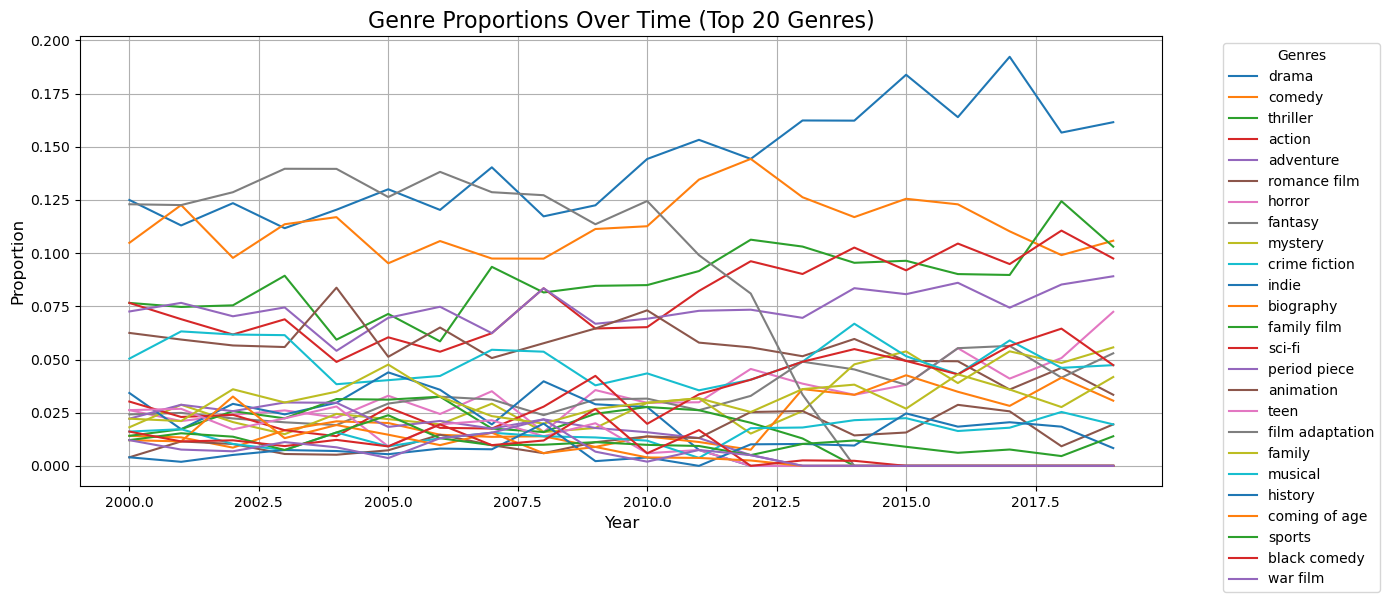

In [ ]:
import matplotlib.pyplot as plt
genre_columns_10 = list(genre_mapping.keys())
genre_yearly_counts_10 = profit_df.groupby('Year')[genre_columns_10].sum()
total_movies_per_year = profit_df.groupby('Year')[genre_columns_10].sum().sum(axis=1)
genre_proportions_10 = genre_yearly_counts_10.div(total_movies_per_year, axis=0)

# Plot the trends of genres over time (proportions)
plt.figure(figsize=(14, 6))
for genre in genre_columns_10:
    plt.plot(genre_proportions_10.index, genre_proportions_10[genre], label=genre)

plt.title('Genre Proportions Over Time (Top 20 Genres)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
profit_df.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'drama', 'comedy', 'thriller', 'action', 'adventure',
       'romance film', 'horror', 'fantasy', 'mystery', 'crime fiction',
       'indie', 'biography', 'family film', 'sci-fi', 'period piece',
       'animation', 'teen', 'film adaptation', 'family', 'musical', 'history',
       'coming of age', 'sports', 'black comedy', 'war film'],
      dtype='object')

<Axes: xlabel='Year'>

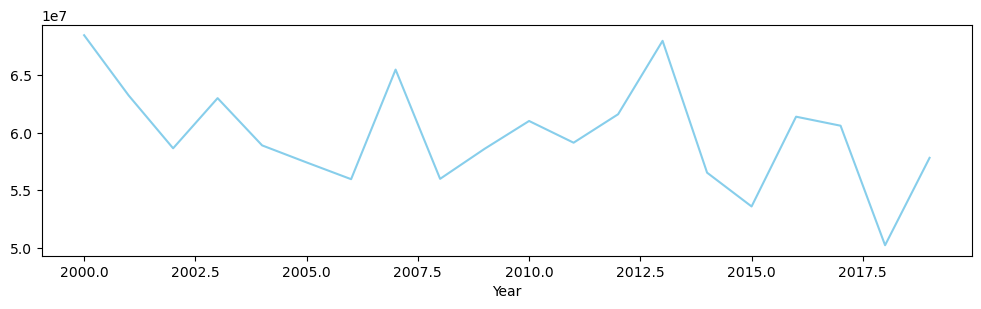

In [ ]:
import matplotlib.pyplot as plt

## spending less and 
year_counts = profit_df['Budget(USD)_Inflated'].groupby(profit_df['Year']).mean()
year_counts.plot(kind='line', color='skyblue', figsize=(12, 3))

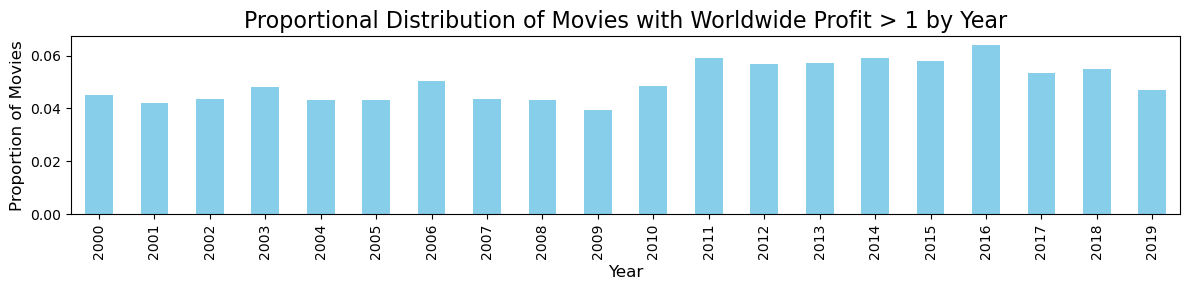

In [ ]:
import matplotlib.pyplot as plt
year_counts = profit_df[profit_df['Worldwide_profit'] > 1]['Year'].value_counts().sort_index()
year_proportions = year_counts / year_counts.sum()
plt.figure(figsize=(12, 3))
year_proportions.plot(kind='bar', color='skyblue')

plt.title('Proportional Distribution of Movies with Worldwide Profit > 1 by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of Movies', fontsize=12)
plt.tight_layout()
plt.show()


## Budget Influence

Budget vs Foreign and Domestic Income for American Movies

In [404]:
def remove_high_val(x):
    x = float(x)
    if x > 1:
        return False
    return True

Initial length of the dataset: 2713
Length after removing all the NaNs: 2713
-----------------------------------------------


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on Budget and Domestic Percentage:
PearsonRResult(statistic=-0.3360680166306911, pvalue=1.278821732960262e-72)


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on Budget and Foreign Percentage:
PearsonRResult(statistic=0.3360680166306909, pvalue=1.2788217329605567e-72)


,Name,Budget(USD)_Inflated,Domestic_Percentage,Foreign_Percentage
0,10 cloverfield lane,6.076746e+06,0.654010,0.345990
1,"10,000 bc",1.441563e+08,0.351333,0.648667
2,12 rounds,2.726275e+07,0.708013,0.291987
3,12 strong,3.979050e+07,0.644274,0.355726
4,12 years a slave,2.539260e+07,0.301875,0.698125


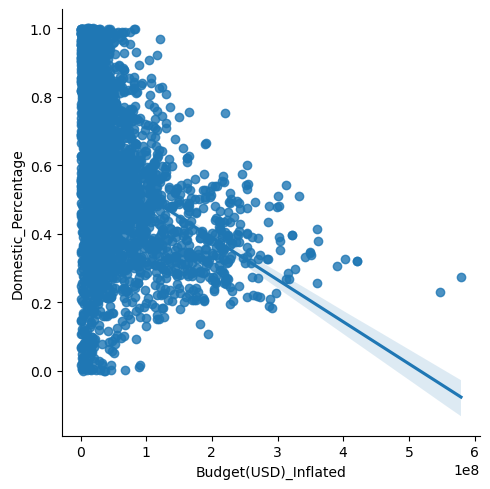

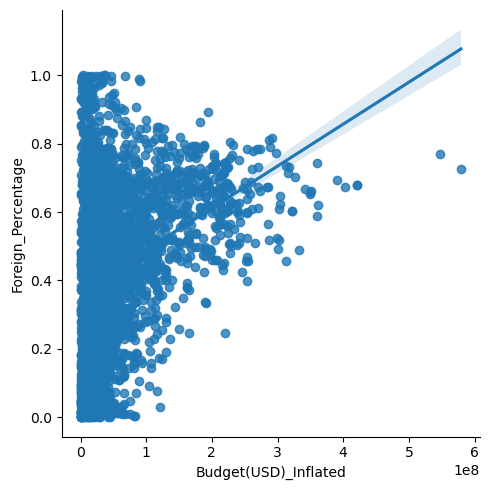

In [850]:
import seaborn as sns
from scipy import stats

df_meg_copy = profit_df.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Domestic_Percentage', 'Foreign_Percentage']]

print(f"Initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Budget(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Domestic_Percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Foreign_Percentage'].notna()]

print(f"Length after removing all the NaNs: {len(df_meg_copy)}")
print("-----------------------------------------------")

df_meg_copy = df_meg_copy[df_meg_copy['Foreign_Percentage'] < 1]

sns.lmplot(x='Budget(USD)_Inflated', y='Domestic_Percentage', data=df_meg_copy)
print("Pearson coefficient on Budget and Domestic Percentage:")
print(stats.pearsonr(df_meg_copy['Budget(USD)_Inflated'], df_meg_copy['Domestic_Percentage']))

sns.lmplot(x='Budget(USD)_Inflated', y='Foreign_Percentage', data=df_meg_copy)
print("Pearson coefficient on Budget and Foreign Percentage:")
print(stats.pearsonr(df_meg_copy['Budget(USD)_Inflated'], df_meg_copy['Foreign_Percentage']))

df_meg_copy.head()



In [849]:
profit_df.columns

Index(['Name', 'Year', 'Countries', 'Genres', 'Budget(USD)_Inflated',
       'Domestic(USD)_Inflated', 'Domestic_Percentage',
       'Foreign(USD)_Inflated', 'Foreign_Percentage',
       'Worldwide(USD)_Inflated', 'Runtime(mins)', 'Rating', 'Audience_Score',
       'Critics_Score', 'drama', 'comedy', 'thriller', 'action', 'adventure',
       'romance film', 'horror', 'fantasy', 'mystery', 'crime fiction',
       'indie', 'biography', 'family film', 'sci-fi', 'period piece',
       'animation', 'teen', 'film adaptation', 'family', 'musical', 'history',
       'coming of age', 'sports', 'black comedy', 'war film',
       'Worldwide_profit'],
      dtype='object')

The two graphs above show a correlation where as budget increases, the income percentage that comes from foreign markets increases while it decreases for domestic markets.

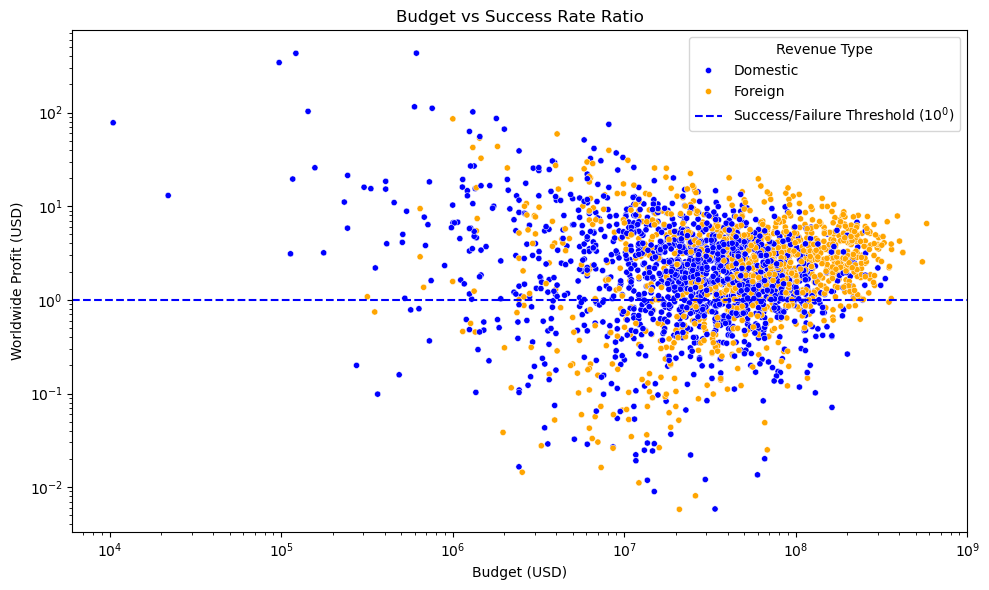

Pearson coefficient on Budget and Success Rate Ratio: -0.07472594409068196


In [863]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Copy of the final dataset
df_meg_copy = profit_df.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Worldwide_profit', 'Domestic_Percentage', 'Foreign_Percentage']]

# Remove rows with missing data
df_meg_copy = df_meg_copy.dropna(subset=['Budget(USD)_Inflated', 'Worldwide_profit', 'Domestic_Percentage', 'Foreign_Percentage'])

# Create a new column to categorize movies based on Domestic_Percentage and Foreign_Percentage
df_meg_copy['Revenue_Type'] = df_meg_copy.apply(
    lambda row: 'Domestic' if row['Domestic_Percentage'] > row['Foreign_Percentage'] else 'Foreign', axis=1
)

# Scatter plot with lmplot (scatter + regression line)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Budget(USD)_Inflated', y='Worldwide_profit', hue='Revenue_Type', data=df_meg_copy, palette={'Domestic': 'blue', 'Foreign': 'orange'}, s=20)

# # Add a regression line (Optional, if you want to add lmplot functionality)
# sns.regplot(x='Budget(USD)_Inflated', y='Worldwide_profit', data=df_meg_copy, scatter=False, color='black')

# # Add threshold line at Worldwide_profit = 1
plt.axhline(y=1, color='blue', linestyle='--', label='Success/Failure Threshold ($10^0$)')

# Labels and Title
plt.xlabel('Budget (USD)')
plt.ylabel('Worldwide Profit (USD)')
plt.xscale('log')
plt.yscale('log')
plt.title('Budget vs Success Rate Ratio')

# Add a legend
plt.legend(title='Revenue Type')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient between Budget and Success Rate Ratio
pearson_corr, _ = stats.pearsonr(df_meg_copy['Budget(USD)_Inflated'], df_meg_copy['Worldwide_profit'])
print(f"Pearson coefficient on Budget and Success Rate Ratio: {pearson_corr}")


C:\Users\giada\AppData\Local\Temp\ipykernel_24012\1425749460.py:41: UserWarning:

The figure layout has changed to tight



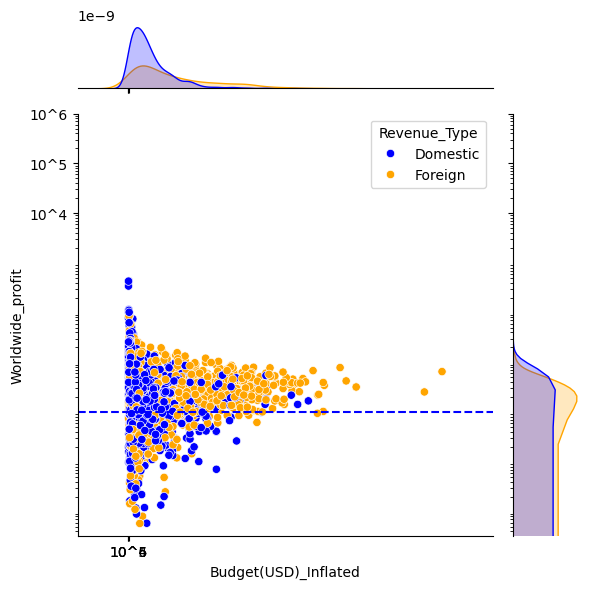

Pearson coefficient on Budget and Success Rate Ratio: -0.07472594409068196


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Copy of the final dataset
df_meg_copy = profit_df.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Worldwide_profit', 'Domestic_Percentage', 'Foreign_Percentage']]

# Remove rows with missing data
df_meg_copy = df_meg_copy.dropna(subset=['Budget(USD)_Inflated', 'Worldwide_profit', 'Domestic_Percentage', 'Foreign_Percentage'])

# Create a new column to categorize movies based on Domestic_Percentage and Foreign_Percentage
df_meg_copy['Revenue_Type'] = df_meg_copy.apply(
    lambda row: 'Domestic' if row['Domestic_Percentage'] > row['Foreign_Percentage'] else 'Foreign', axis=1
)

# Plot using seaborn's jointplot, which will show scatter plot with histograms on x and y axes
sns.jointplot(
    x='Budget(USD)_Inflated', 
    y='Worldwide_profit', 
    data=df_meg_copy, 
    kind='scatter',  # scatter plot in the middle
    hue='Revenue_Type',  # Color by Domestic or Foreign
    palette={'Domestic': 'blue', 'Foreign': 'orange'}, 
    marginal_kws={},  # Set number of bins for histograms
)


# Add a threshold line at Worldwide_profit = 1
plt.axhline(y=1, color='blue', linestyle='--', label='Success/Failure Threshold ($10^0$)')

# Set logarithmic scale for both axes

plt.yscale('log')

# Adjust the tick labels for better visibility
plt.xticks([10**4, 10**5, 10**6], ['10^4', '10^5', '10^6'])
plt.yticks([10**4, 10**5, 10**6], ['10^4', '10^5', '10^6'])

# Show the plot
plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient between Budget and Success Rate Ratio
pearson_corr, _ = stats.pearsonr(df_meg_copy['Budget(USD)_Inflated'], df_meg_copy['Worldwide_profit'])
print(f"Pearson coefficient on Budget and Success Rate Ratio: {pearson_corr}")


## Does runtime actually have an impact on the foreign gross?

Very weak correlation, but it seems to be that the movies with longer runtime fair better abroad in terms of percentage than domenstically, probably because the longer films are most lickely the blockbusters...
could filter out the action movies..

Initial length of the dataset: 3023
Length after removing all the NaNs: 3023
-----------------------------------------------


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coeff on runtime and domestic gross (inflated)
PearsonRResult(statistic=0.31367815670927934, pvalue=5.210917314581307e-70)


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coeff on runtime and foreign gross (inflated)
PearsonRResult(statistic=0.34229097012158194, pvalue=7.565053696250843e-84)


,Name,Budget(USD)_Inflated,Runtime(mins),Domestic(USD)_Inflated,Foreign(USD)_Inflated,Domestic_Percentage,Foreign_Percentage
0,10 cloverfield lane,6.076746e+06,103,8.760602e+07,4.634613e+07,0.654010,0.345990
2,"10,000 bc",1.441563e+08,109,1.301309e+08,2.402606e+08,0.351333,0.648667
4,12 rounds,2.726275e+07,108,1.667757e+07,6.877890e+06,0.708013,0.291987
5,12 strong,3.979050e+07,130,5.209113e+07,2.876133e+07,0.644274,0.355726
6,12 years a slave,2.539260e+07,134,7.195247e+07,1.663993e+08,0.301875,0.698125


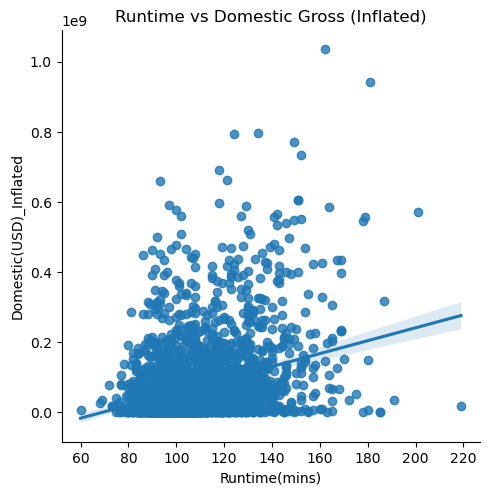

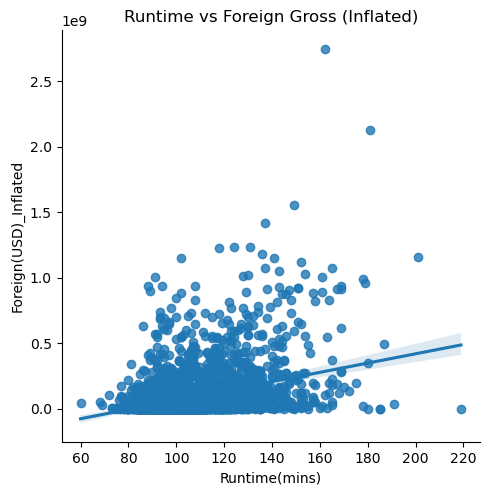

In [ ]:


# Copy and filter the dataset
df_meg_copy = final_df.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Runtime(mins)', 'Domestic(USD)_Inflated', 
                           'Foreign(USD)_Inflated', 'Domestic_Percentage', 'Foreign_Percentage']]

print(f"Initial length of the dataset: {len(df_meg_copy)}")

df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Domestic(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Foreign(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'] != 0]
print(f"Length after removing all the NaNs: {len(df_meg_copy)}")
print("-----------------------------------------------")

# Plot for domestic gross vs runtime
sns.lmplot(x='Runtime(mins)', y='Domestic(USD)_Inflated', data=df_meg_copy)
plt.title('Runtime vs Domestic Gross (Inflated)')

# Pearson correlation for domestic gross
print("Pearson coeff on runtime and domestic gross (inflated)")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Domestic(USD)_Inflated']))

# Plot for foreign gross vs runtime
sns.lmplot(x='Runtime(mins)', y='Foreign(USD)_Inflated', data=df_meg_copy)
plt.title('Runtime vs Foreign Gross (Inflated)')

# Pearson correlation for foreign gross
print("Pearson coeff on runtime and foreign gross (inflated)")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Foreign(USD)_Inflated']))

# Display the first few rows of the filtered dataset
df_meg_copy.head()




Initial length of the dataset: 3023
Length after removing all the NaNs: 3023
-----------------------------------------------


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on runtime and domestic USD Inflated:
PearsonRResult(statistic=-0.1592854631297163, pvalue=1.2460298980100892e-18)


c:\Users\giada\.conda\envs\ada\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



Pearson coefficient on runtime and foreign USD Inflated:
PearsonRResult(statistic=0.15928546312971625, pvalue=1.2460298980100892e-18)


,Name,Budget(USD)_Inflated,Runtime(mins),Domestic_Percentage,Foreign_Percentage,Domestic(USD)_Inflated,Foreign(USD)_Inflated
0,10 cloverfield lane,6.076746e+06,103,0.654010,0.345990,8.760602e+07,4.634613e+07
2,"10,000 bc",1.441563e+08,109,0.351333,0.648667,1.301309e+08,2.402606e+08
4,12 rounds,2.726275e+07,108,0.708013,0.291987,1.667757e+07,6.877890e+06
5,12 strong,3.979050e+07,130,0.644274,0.355726,5.209113e+07,2.876133e+07
6,12 years a slave,2.539260e+07,134,0.301875,0.698125,7.195247e+07,1.663993e+08


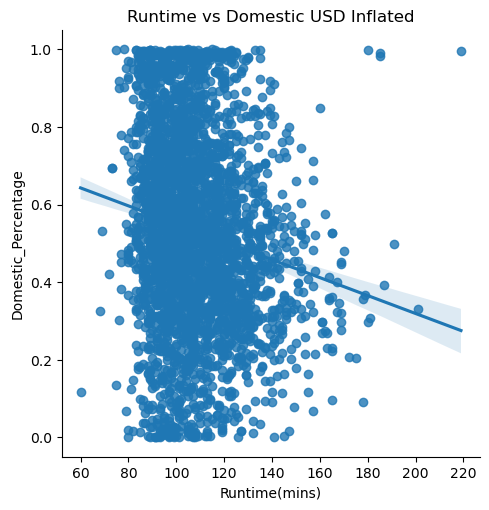

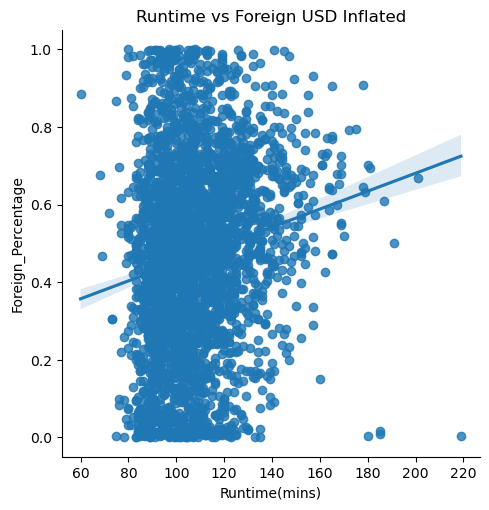

In [ ]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df_meg_copy = final_df.copy(deep=True)
df_meg_copy = df_meg_copy[['Name', 'Budget(USD)_Inflated', 'Runtime(mins)', 'Domestic_Percentage', 'Foreign_Percentage', 'Domestic(USD)_Inflated', 'Foreign(USD)_Inflated']]

print(f"Initial length of the dataset: {len(df_meg_copy)}")

# Remove rows with missing values in the relevant columns
df_meg_copy = df_meg_copy[df_meg_copy['Budget(USD)_Inflated'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Domestic_Percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Foreign_Percentage'].notna()]
df_meg_copy = df_meg_copy[df_meg_copy['Runtime(mins)'] != 0]

print(f"Length after removing all the NaNs: {len(df_meg_copy)}")
print("-----------------------------------------------")

# Plot for domestic percentage vs runtime
sns.lmplot(x='Runtime(mins)', y='Domestic_Percentage', data=df_meg_copy)
plt.title('Runtime vs Domestic USD Inflated')

# Pearson correlation for domestic percentage and runtime
print("Pearson coefficient on runtime and domestic USD Inflated:")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Domestic_Percentage']))

# Plot for foreign percentage vs runtime
sns.lmplot(x='Runtime(mins)', y='Foreign_Percentage', data=df_meg_copy)
plt.title('Runtime vs Foreign USD Inflated')

# Pearson correlation for foreign percentage and runtime
print("Pearson coefficient on runtime and foreign USD Inflated:")
print(stats.pearsonr(df_meg_copy['Runtime(mins)'], df_meg_copy['Foreign_Percentage']))

# Display the first few rows of the filtered dataset
df_meg_copy.head()

## regression

In [437]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the dataset (with one-hot encoded genres)
X = randoom_forest_df.drop(columns=['Foreign_Percentage'])
y = randoom_forest_df['Foreign_Percentage']

# Train a Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Display the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Year, Importance: 0.06645019241246315
Feature: Budget(USD)_Inflated, Importance: 0.2524103419931261
Feature: Runtime(mins), Importance: 0.12219658071643386
Feature: Audience_Score, Importance: 0.14307654684020404
Feature: Critics_Score, Importance: 0.1515323897988501
Feature: Cumulative_Inflation, Importance: 0.0644525551267547
Feature: drama, Importance: 0.014238925739959272
Feature: comedy, Importance: 0.03574495156403648
Feature: action, Importance: 0.01213114212279512
Feature: thriller, Importance: 0.021681070390595022
Feature: adventure, Importance: 0.00959728084154573
Feature: romance film, Importance: 0.006064847013411
Feature: horror, Importance: 0.011521505318219936
Feature: fantasy, Importance: 0.0065303901879710195
Feature: mystery, Importance: 0.0071172594924564115
Feature: crime fiction, Importance: 0.0061890708437712825
Feature: romantic comedy, Importance: 0.00490042969159459
Feature: indie, Importance: 0.007772962912293839
Feature: biography, Importance: 0.0114

In [ ]:
## CHECK IF THE TYPE OF GENRE APART FORM BUDGET AND RUNTIME GETS ME A HIGHER PERCENTAGE IN FOREIGN GROSS...

## genres.. 

In [170]:
all_genres = (
    final_df['Genres']
    .dropna()  # Removing NaN values from the Genres column
    .str.replace('/', ', ')  # Replacing slashes with a comma and space
    .str.split(', ')  # Splitting by comma and space
    .explode()  # Flattening the list of genres into individual rows
    .value_counts()  # Counting occurrences of each genre
)
top_20_genres = all_genres.head(20).index
top_20_genres

Index(['drama', 'action', 'comedy', 'adventure', 'thriller', 'romance film',
       'crime fiction', 'romantic comedy', 'fantasy', 'family film', 'indie',
       'horror', 'period piece', 'mystery', 'science fiction',
       'crime thriller', 'film adaptation', 'romantic drama', 'comedy-drama',
       'teen'],
      dtype='object', name='Genres')

In [ ]:
# Creating a new DataFrame excluding rows with NaN in the relevant columns so it doesn't affect the final plots
filtered_df = final_df.dropna(subset=['Genres', 'Domestic(USD)', 'Foreign(USD)'])

# Initializing a dictionary to store gross for each genre in the top 20
genre_gross = {genre: {'Domestic(USD)': 0, 'Foreign(USD)': 0} for genre in top_20_genres}

# Iterating through the filtered dataset and summing gross for each genre
for idx, row in filtered_df.iterrows():
    genres = str(row['Genres']).replace('/', ', ').split(', ')# Splitting the genres of the current movie ('/' and ', ' considered as separations)
    domestic = row['Domestic(USD)']                          # Storing the corresponding Domestic(USD) value
    foreign = row['Foreign(USD)']                            # Storing the corresponding Foreign(USD) value
    
    for genre in genres:
        # If the genre is in the top 20, we sum the gross to that genre
        if genre in top_20_genres:
            genre_gross[genre]['Domestic(USD)'] += domestic
            genre_gross[genre]['Foreign(USD)'] += foreign


Genres
drama              1249
action             1046
comedy             1001
adventure           846
thriller            794
romance film        574
crime fiction       423
romantic comedy     293
fantasy             282
family film         276
indie               272
horror              269
period piece        251
mystery             249
science fiction     241
crime thriller      215
film adaptation     207
romantic drama      200
comedy-drama        184
teen                157
Name: count, dtype: int64